In [256]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import scipy
import pickle
import operator
from antenna import Antenna
import itertools
from tqdm import tqdm
from matplotlib import gridspec

In [2]:
with open("../config.json", 'r') as cfg:
    params = json.load(cfg)

antenna_params = params["antenna_params"]
opt_params = params["optimisation_params"]
print(antenna_params)
print(opt_params)

{'N': 10, 'd': 0.5, 'wavelengths': [1, 2], 'beam_resolution': 1}
{'general': {'method': 'trust-constr'}, 'options': {'maxiter': 1000, 'verbose': 3}}


In [4]:
def compute_possible_conf(N, verbose=0, jac=True, hess=True, maxiter=500):
    antenna_params["N"] = N
    opt_params["options"]["verbose"] = verbose
    opt_params["options"]["maxiter"] = maxiter
    antenna = Antenna(antenna_params)
    antenna.set_objective(weights=[1.0, 1.0])
    antenna.set_jacobian(weights=[1.0, 1.0])
    antenna.set_hessian(weights=[1.0, 1.0])
    configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))
    
    values = []
    for cfg in tqdm(configurations):
        antenna.set_configuration(cfg)
        f, _ = antenna.get_optimal_current_allocation(opt_params, 
                                                      x0=-np.ones(antenna.N), 
                                                      cons=False, 
                                                      jac=jac, 
                                                      hess=hess)
        values.append(f)
    return values, configurations

In [297]:
def currents_plot(N, values, conf, figsize=(20, 5), suffix=''):
    plt.figure(figsize=figsize, dpi=300)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
    
    plt.subplot(gs[0])
    plt.plot(values, '.-r')
    plt.xlim([-0.5, len(values) - 0.5])
    plt.grid(True)

    plt.subplot(gs[1])
    plt.imshow(np.array(conf).T, interpolation='nearest', aspect='auto')
    plt.yticks(np.arange(0.5, N+0.5, 1), labels=[])
    plt.xticks(np.arange(0.5, len(conf)+0.5, 1), labels=[])
    plt.grid(b=True, which='major')
    
    plt.tight_layout()
    plt.savefig(f"../results/imgs/{N}_currents_analysis_{suffix}.png")
    plt.show()

In [118]:
def save_data(N, values, conf, path='../results/calc/'):
    pickle.dump({f"values_{N}": values, f"conf_{N}": conf}, open(path + f"{N}_currents_data.pickle", 'wb'))

In [128]:
def get_data(N, path='../results/calc/'):
    temp = pickle.load(open(path + f"{N}_currents_data.pickle", 'rb'))
    values = temp[f"values_{N}"]
    conf = temp[f"conf_{N}"]
    return values, conf

In [157]:
def get_conf_dict(values, conf):
    return dict(zip(conf, values))

In [221]:
def gray_code(n):
    def gray_code_recurse (g, n):
        k = len(g)
        if n <= 0:
            return
        else:
            for i in range (k-1,-1,-1):
                char='1,' + g[i]
                g.append(char)
            for i in range (k-1,-1,-1):
                g[i]='0,' + g[i]
            gray_code_recurse(g,n-1)
    g = ['0', '1']
    gray_code_recurse(g,n-1)
    return g

In [240]:
def gray_code_repr(conf_dict):
    N = len(list(conf_dict.keys())[0])
    gray_conf = gray_code(N)
    conf_dict_gray = {}
    for k in gray_conf:
        conf_elem = tuple([int(e) for e in k.split(',')])
        conf_dict_gray[conf_elem] = conf_dict[conf_elem]
    return conf_dict_gray

In [262]:
def sorted_repr(conf_dict):
    sorted_dict = sorted(conf_dict.items(), key=operator.itemgetter(1))
    return dict(sorted_dict)

# 3 currents - possible solutions

In [6]:
# values3, conf3 = compute_possible_conf(3)
values3_num, conf3 = compute_possible_conf(3, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values3_num)}")

  0%|          | 0/8 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 8/8 [00:00<00:00, 14.70it/s]

obj function value for the optimal configuration: 13.230457878770908


In [264]:
conf3_values = get_conf_dict(values3_num, conf3)
conf3_values_gray = gray_code_repr(conf3_values)
conf3_values_sorted = sorted_repr(conf3_values)

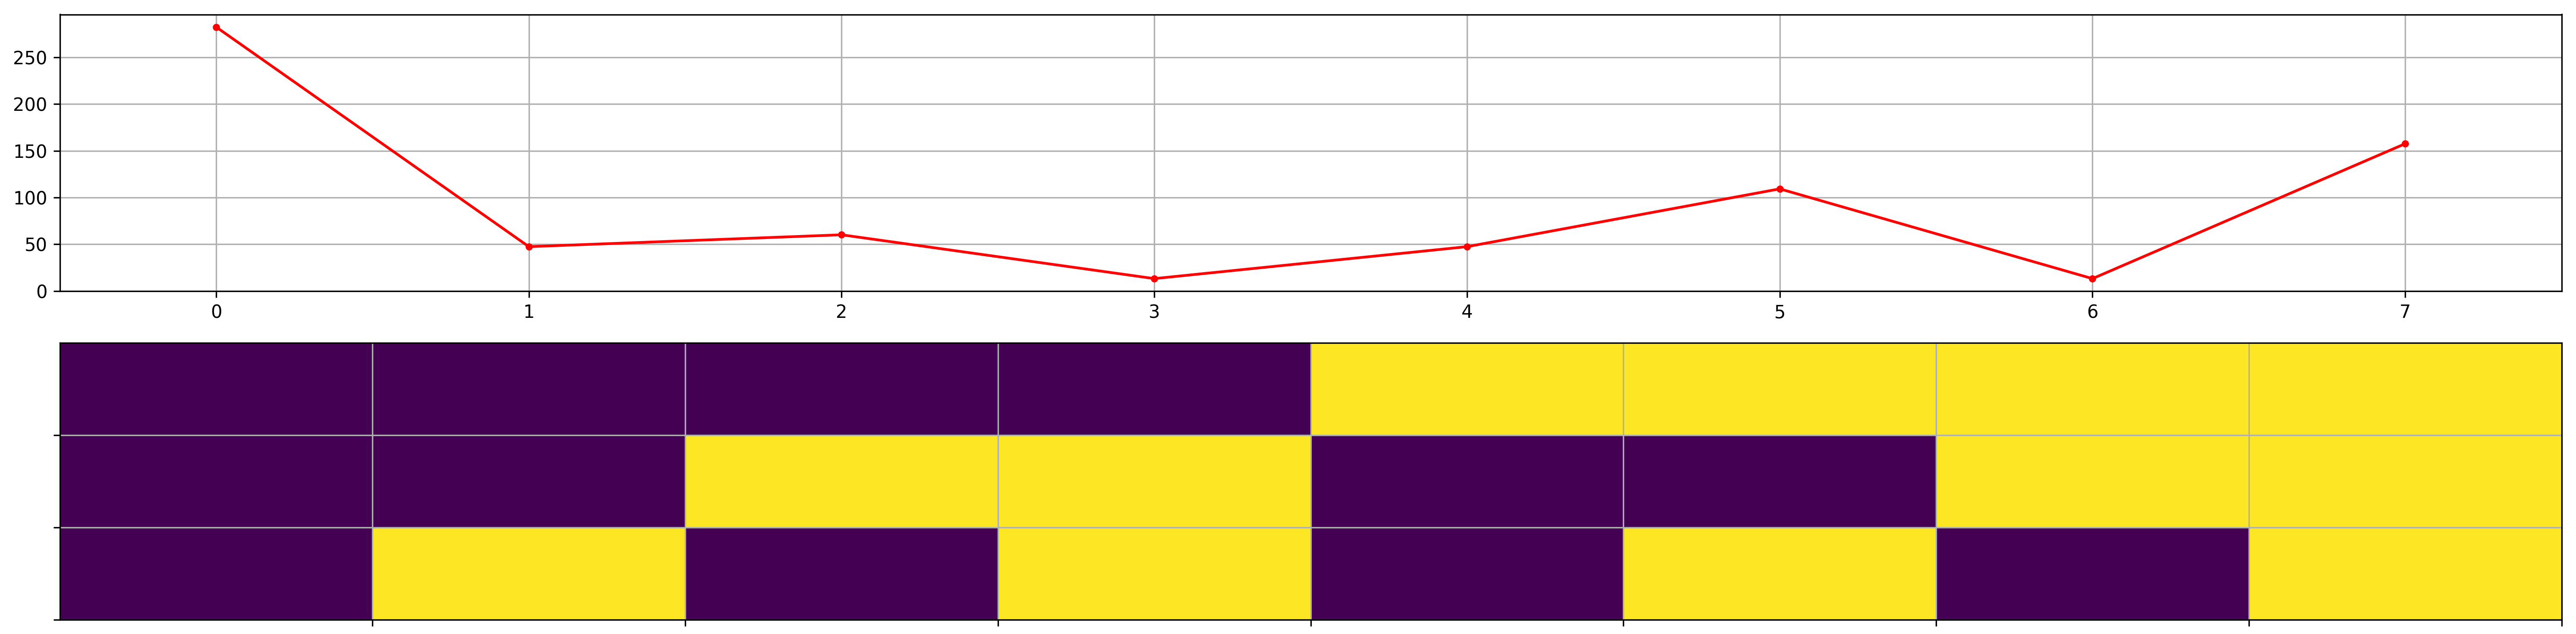

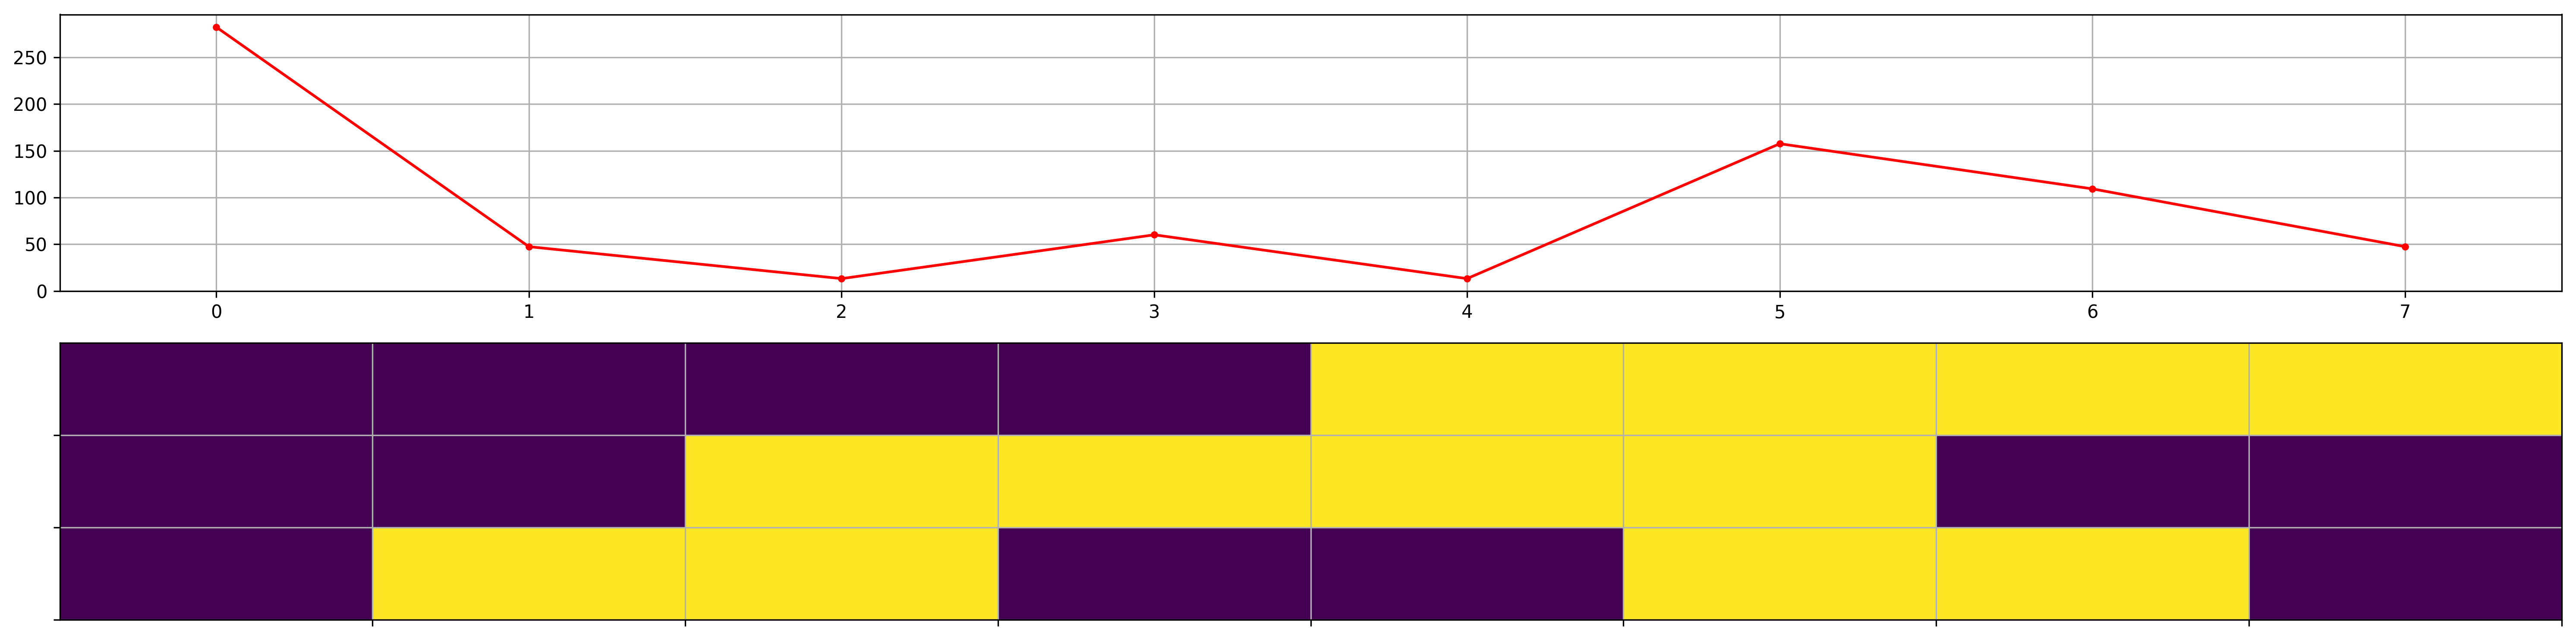

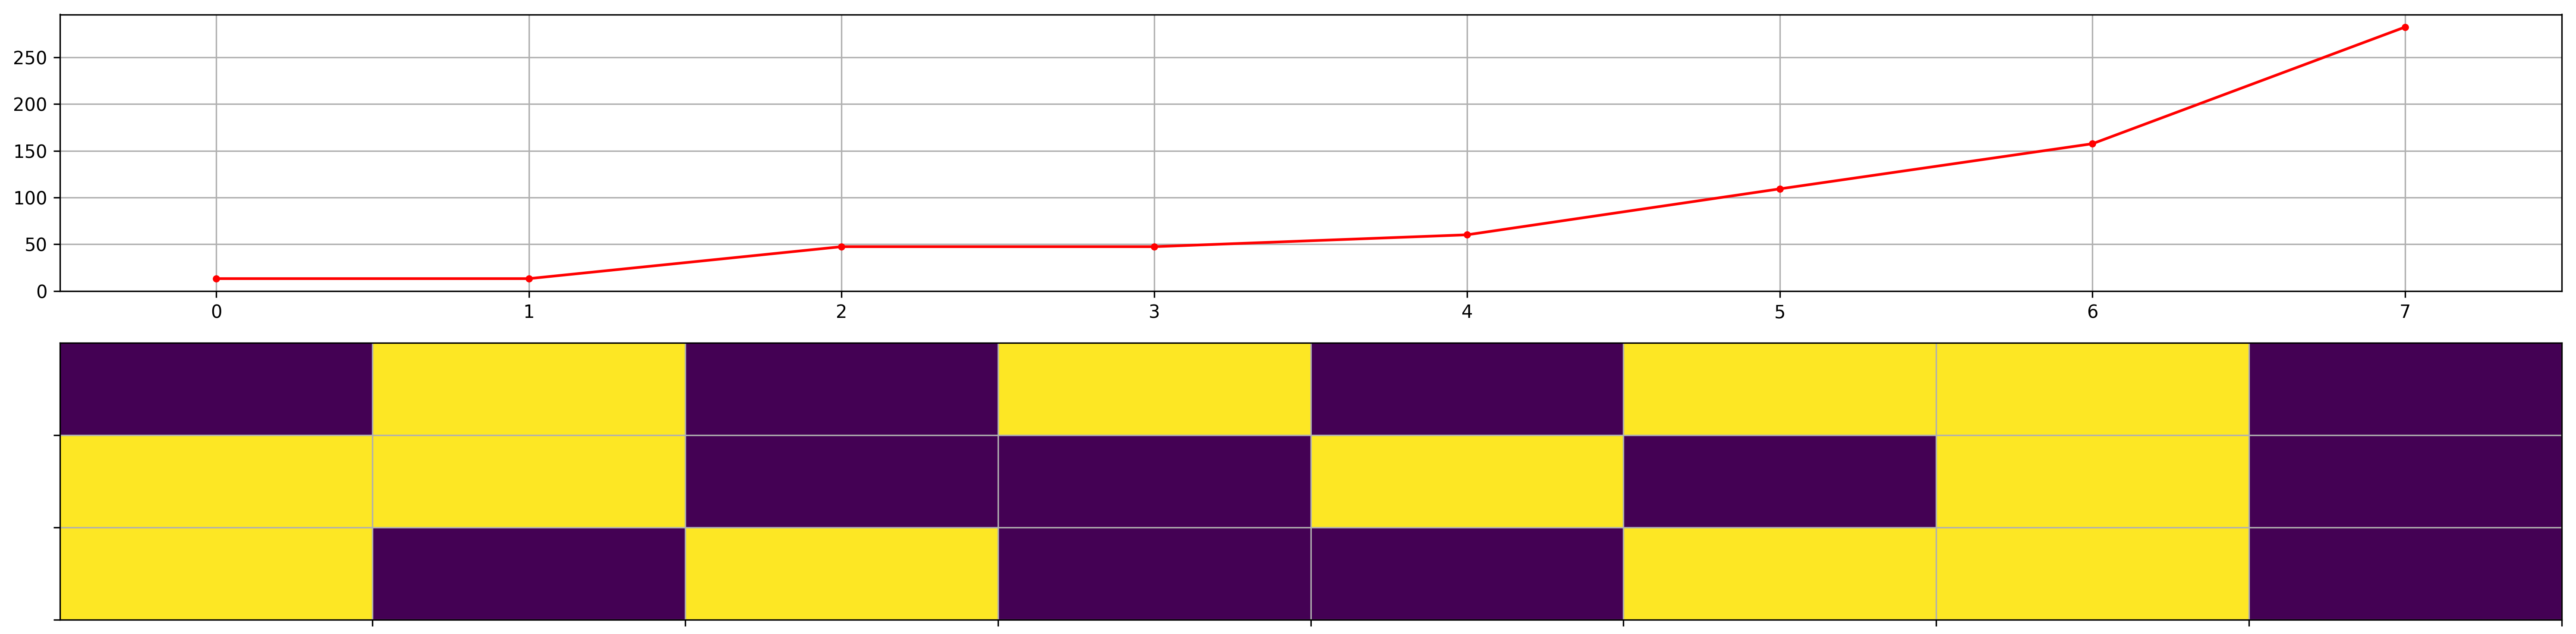

In [277]:
currents_plot(3, values3_num, list(conf3_values.keys()), suffix='original')
currents_plot(3, list(conf3_values_gray.values()), list(conf3_values_gray.keys()), suffix='gray')
currents_plot(3, list(conf3_values_sorted.values()), list(conf3_values_sorted.keys()), suffix='sorted')

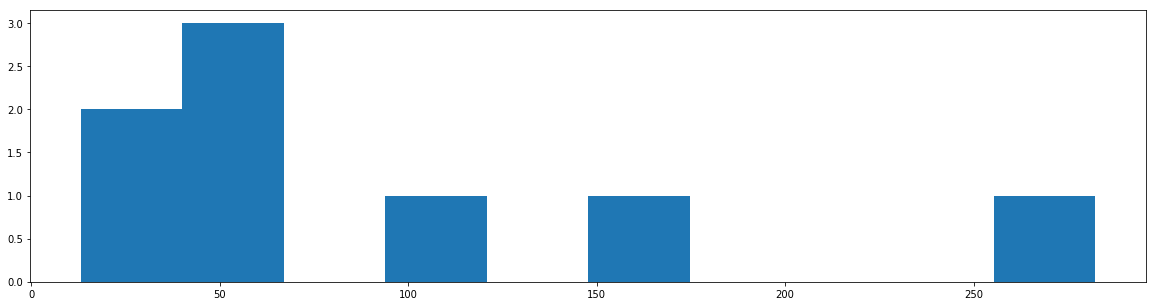

In [10]:
plt.figure(figsize=(20, 5))
plt.hist(values3_num)
plt.show()

In [119]:
save_data(3, values=values3_num, conf=conf3)

In [129]:
values3, conf3 = get_data(3)

## 4 currents - possible solutions

In [12]:
# values4, conf4 = compute_possible_conf(4, verbose=0)
values4_num, conf4 = compute_possible_conf(4, jac=False, hess=False, verbose=0)
print(f"obj function value for the optimal configuration: {min(values4_num)}")

  0%|          | 0/16 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 16/16 [00:01<00:00,  8.52it/s]

obj function value for the optimal configuration: 12.27944153675312


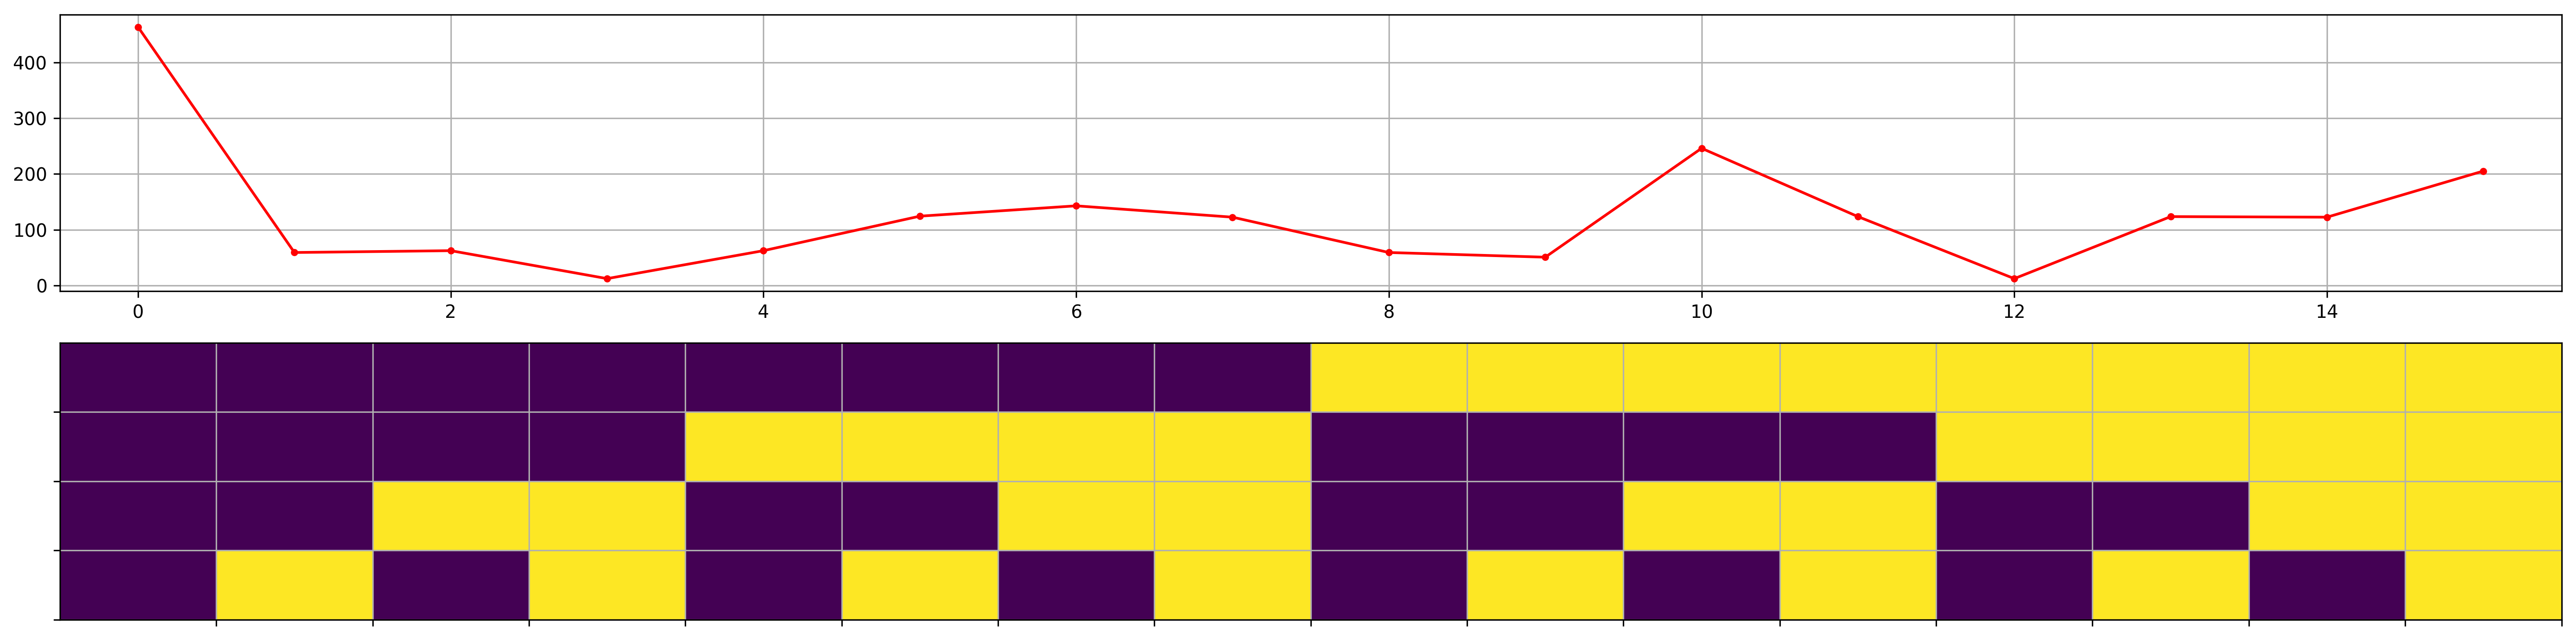

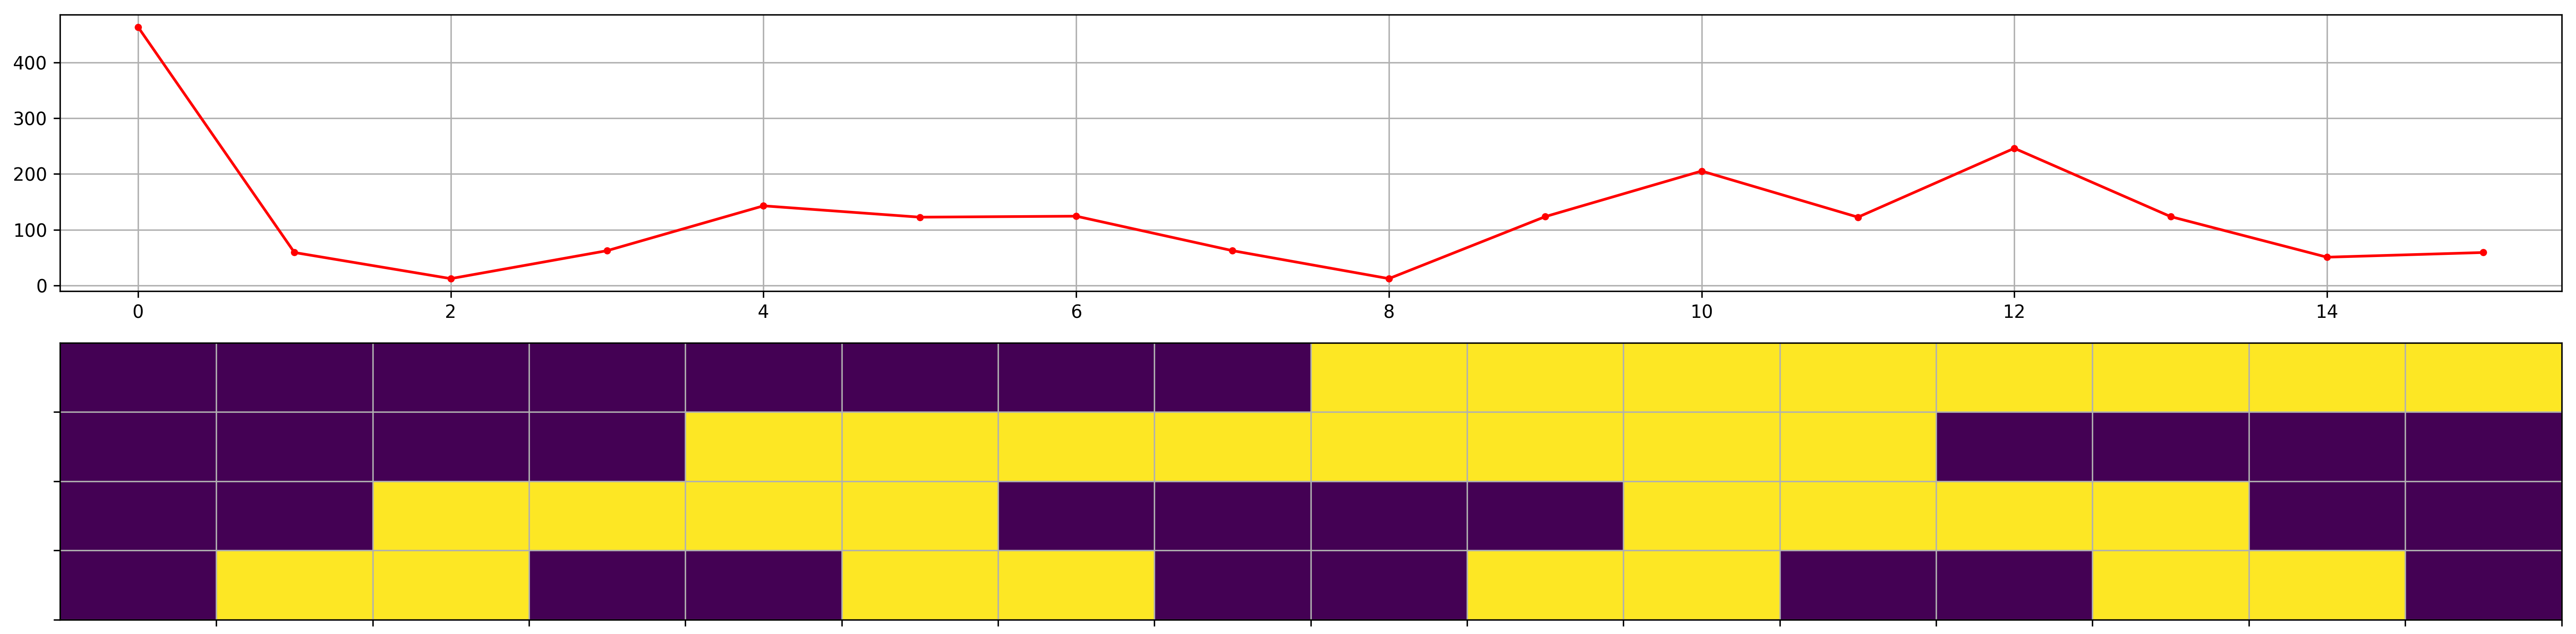

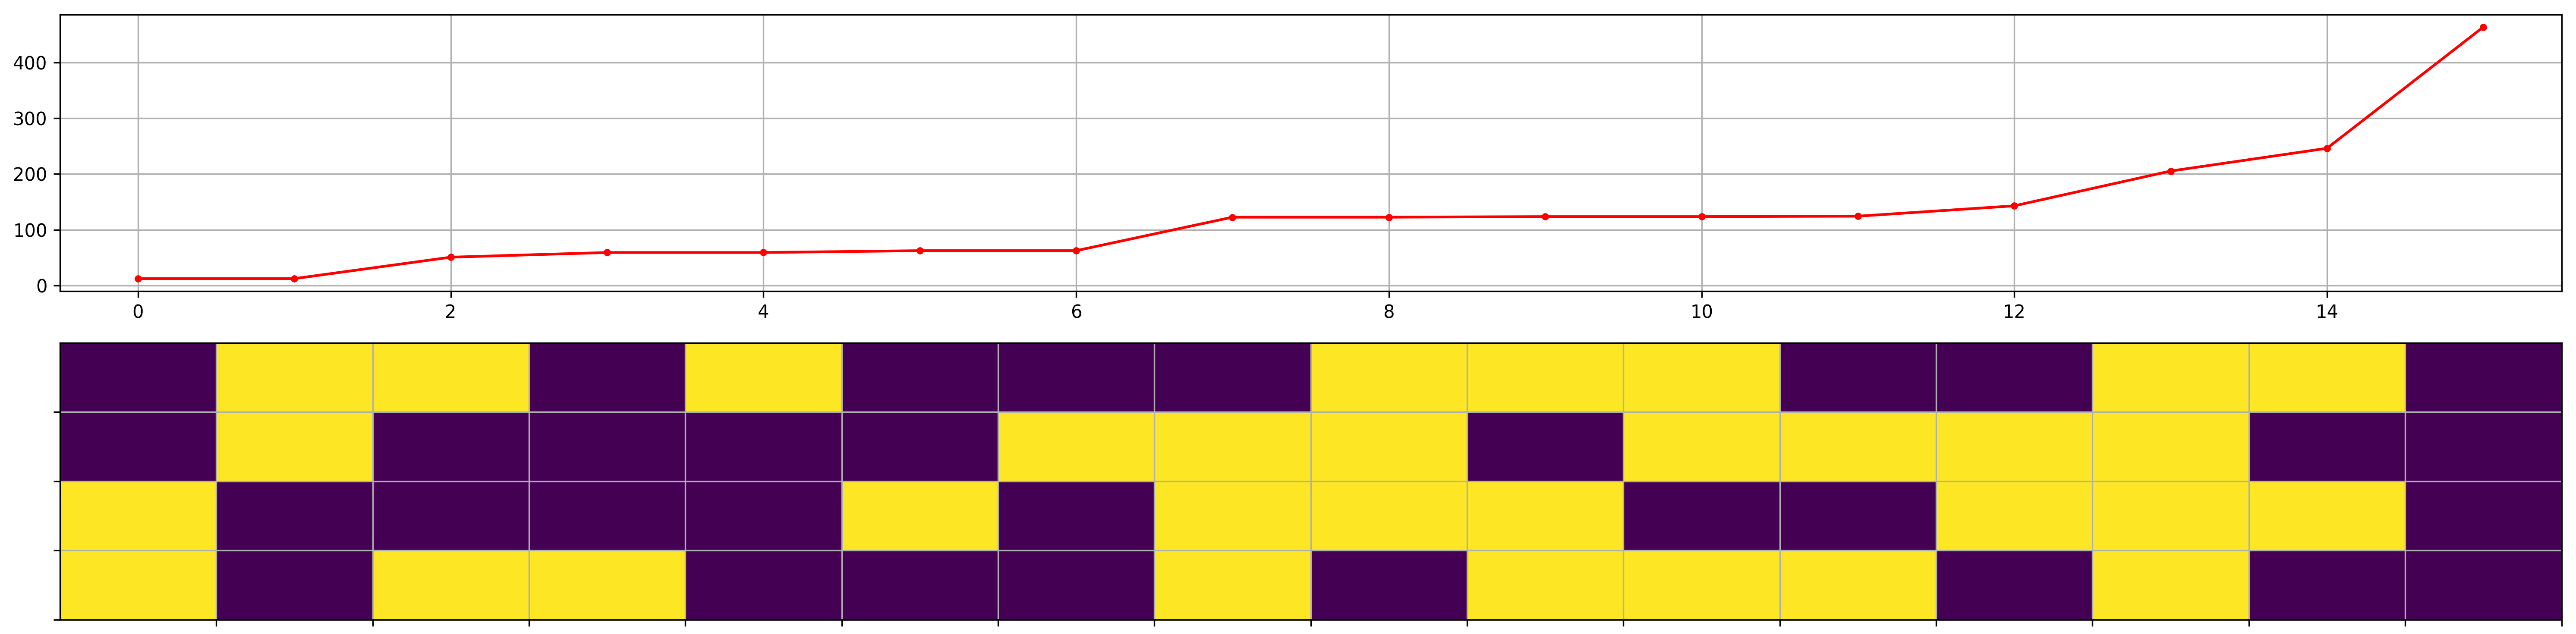

In [266]:
conf4_values = get_conf_dict(values4_num, conf4)
conf4_values_gray = gray_code_repr(conf4_values)
conf4_values_sorted = sorted_repr(conf4_values)

currents_plot(4, list(conf4_values.values()), list(conf4_values.keys()))
currents_plot(4, list(conf4_values_gray.values()), list(conf4_values_gray.keys()))
currents_plot(4, list(conf4_values_sorted.values()), list(conf4_values_sorted.keys()))

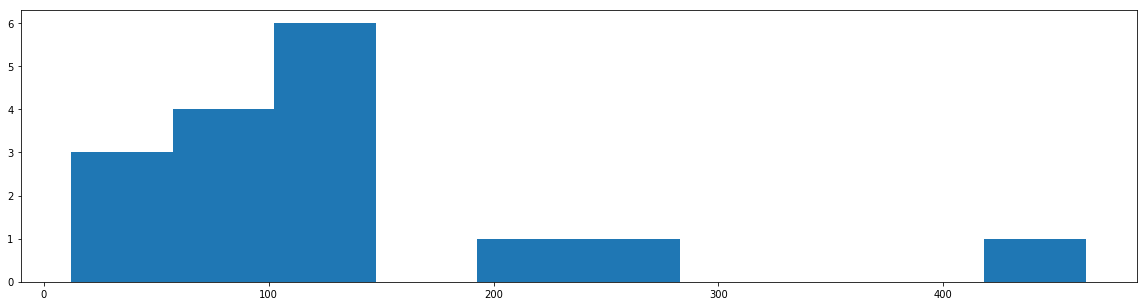

In [14]:
plt.figure(figsize=(20, 5))
plt.hist(values4_num)
plt.show()

In [132]:
save_data(4, values=values4_num, conf=conf4)

## 5 currents - possible solutions

In [15]:
# values5, conf5 = compute_possible_conf(5)
values5_num, conf5 = compute_possible_conf(5, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values5_num)}")

  0%|          | 0/32 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 32/32 [00:08<00:00,  3.99it/s]

obj function value for the optimal configuration: 21.183437768700205


In [267]:
conf5_values = get_conf_dict(values5_num, conf5)
conf5_values_gray = gray_code_repr(conf5_values)
conf5_values_sorted = sorted_repr(conf5_values)

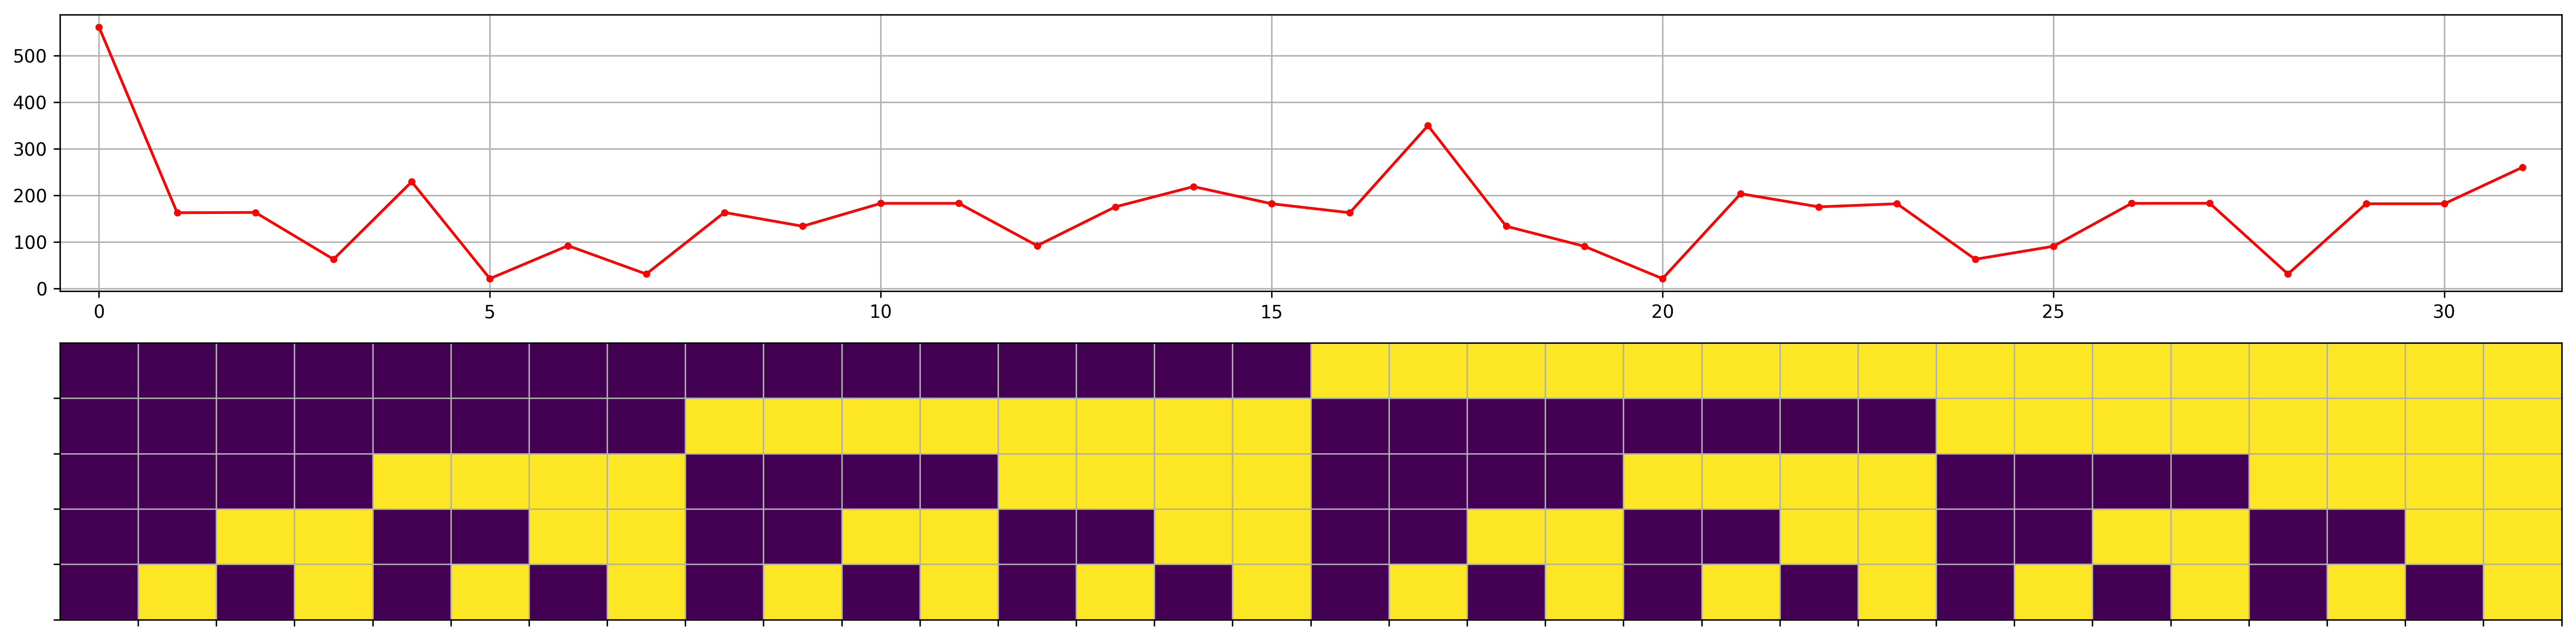

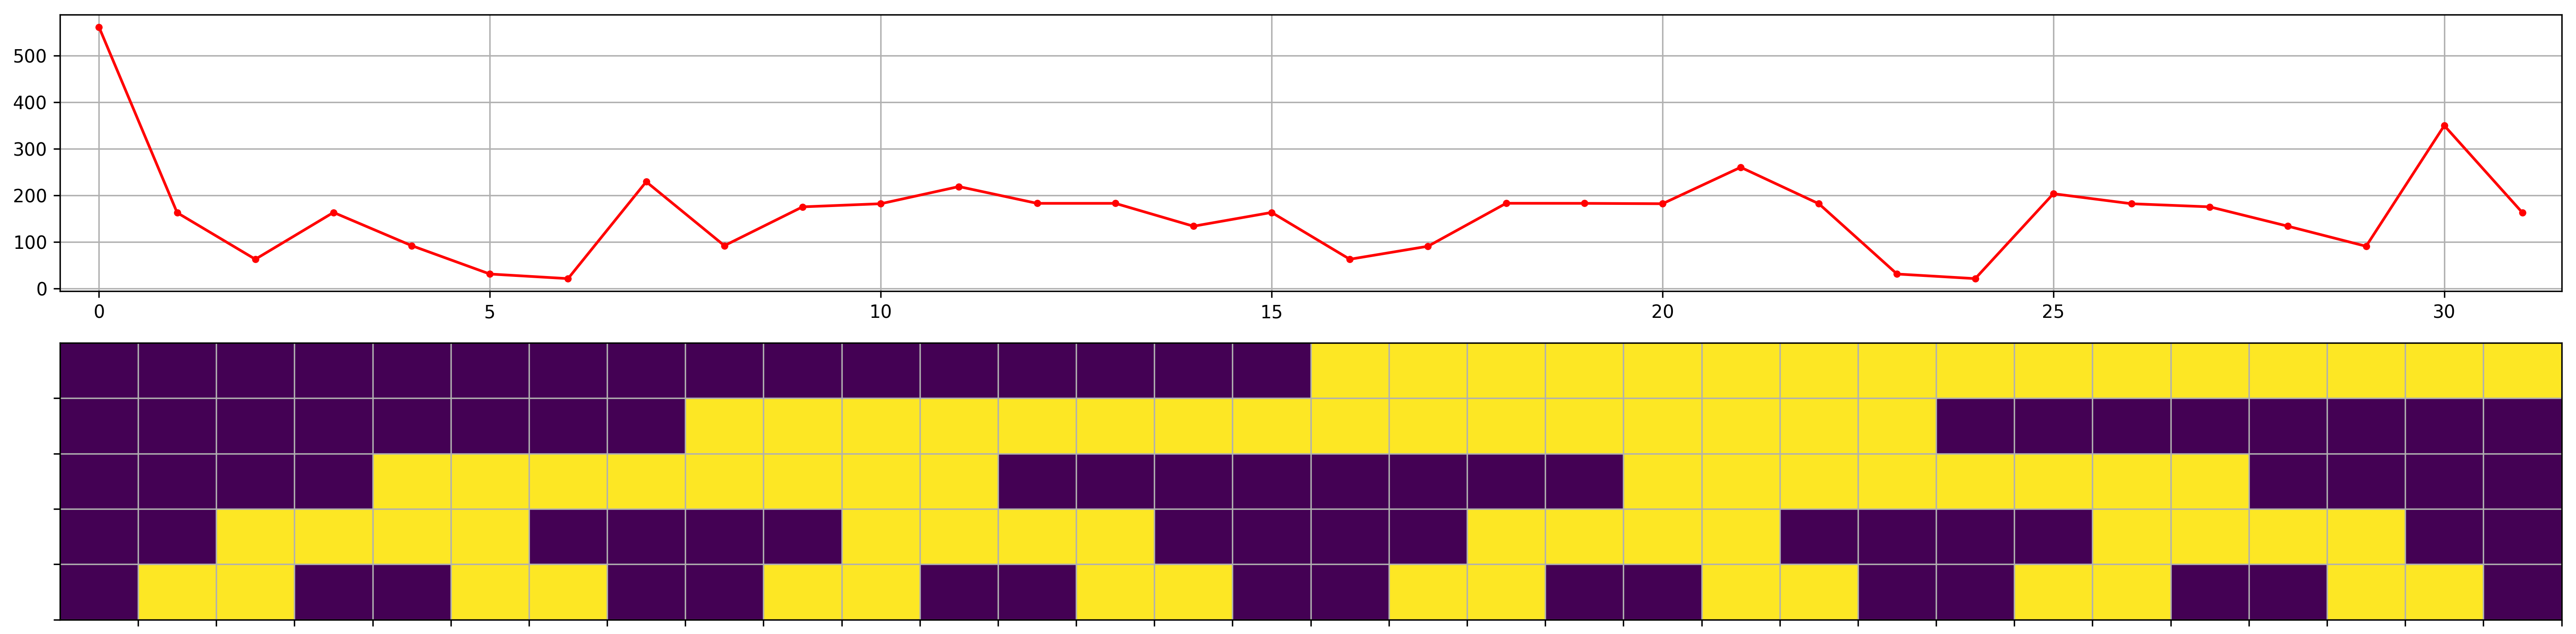

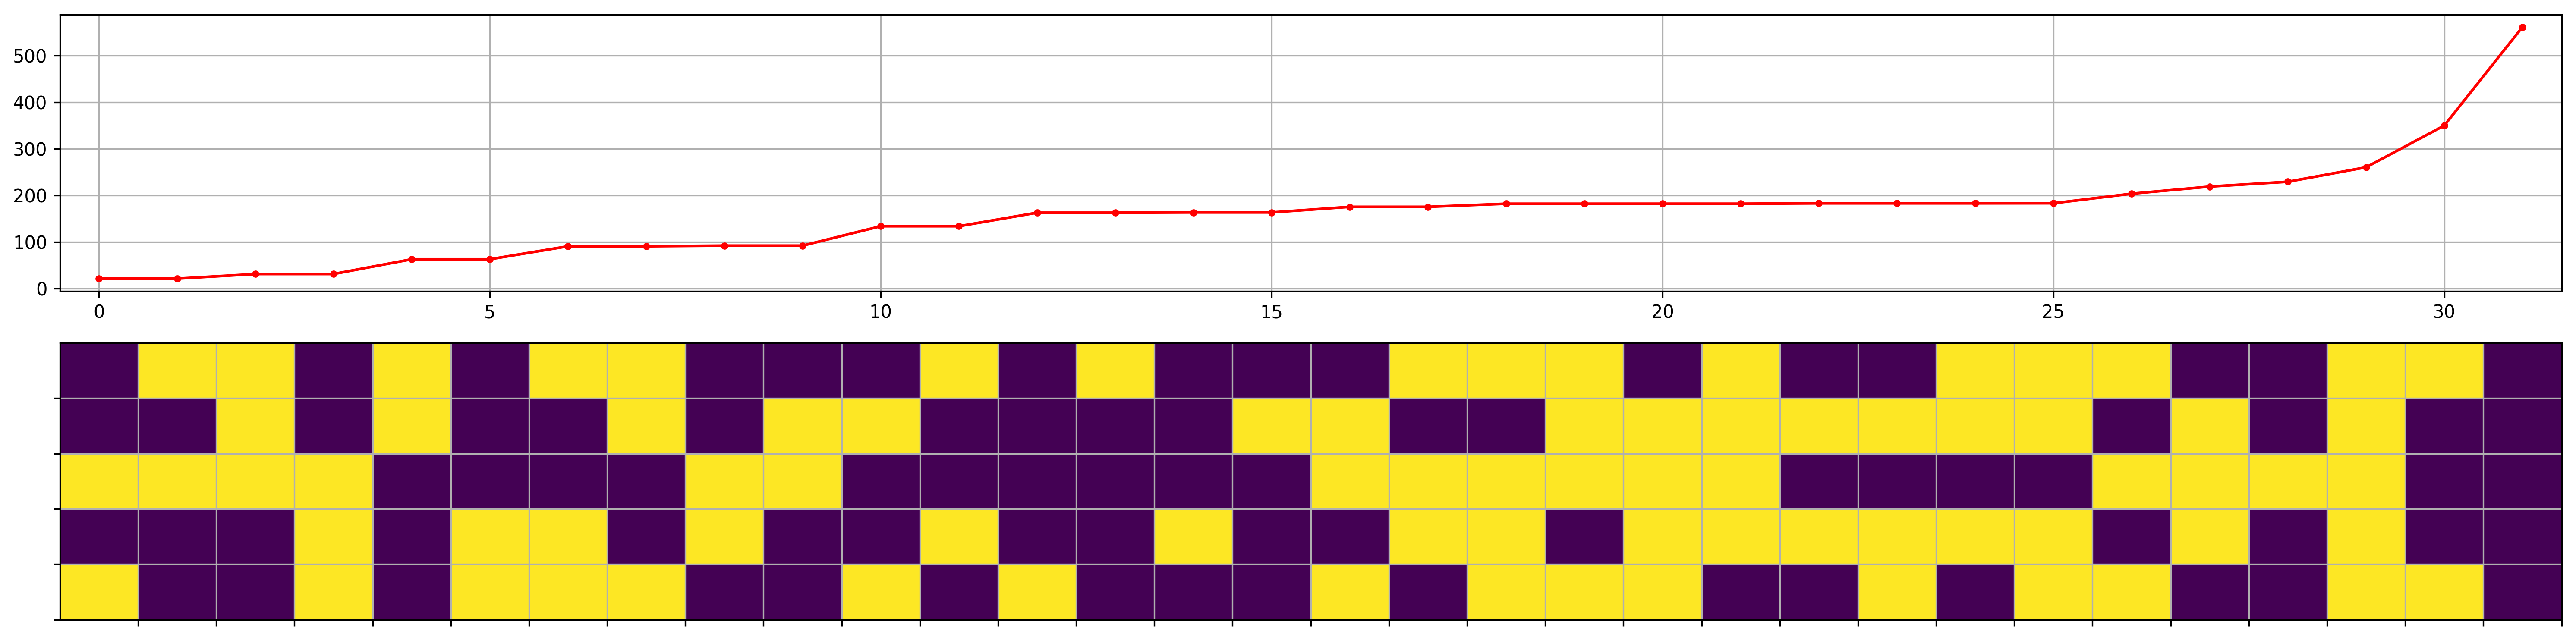

In [268]:
currents_plot(5, list(conf5_values.values()), list(conf5_values.keys()))
currents_plot(5, list(conf5_values_gray.values()), list(conf5_values_gray.keys()))
currents_plot(5, list(conf5_values_sorted.values()), list(conf5_values_sorted.keys()))

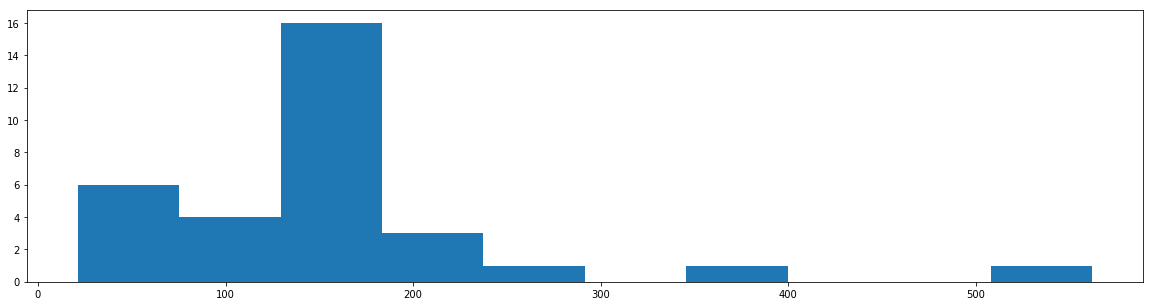

In [17]:
plt.figure(figsize=(20, 5))
plt.hist(values5_num)
plt.show()

In [133]:
save_data(5, values=values5_num, conf=conf5)

## 6 currents - possible solutions

In [18]:
# values6, conf6 = compute_possible_conf(6)
values6_num, conf6 = compute_possible_conf(6, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values6_num)}")

 44%|████▍     | 28/64 [00:09<00:15,  2.29it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 64/64 [00:29<00:00,  2.44it/s]

obj function value for the optimal configuration: 7.133994414852171


In [270]:
conf6_values = get_conf_dict(values6_num, conf6)
conf6_values_gray = gray_code_repr(conf6_values)
conf6_values_sorted = sorted_repr(conf6_values)

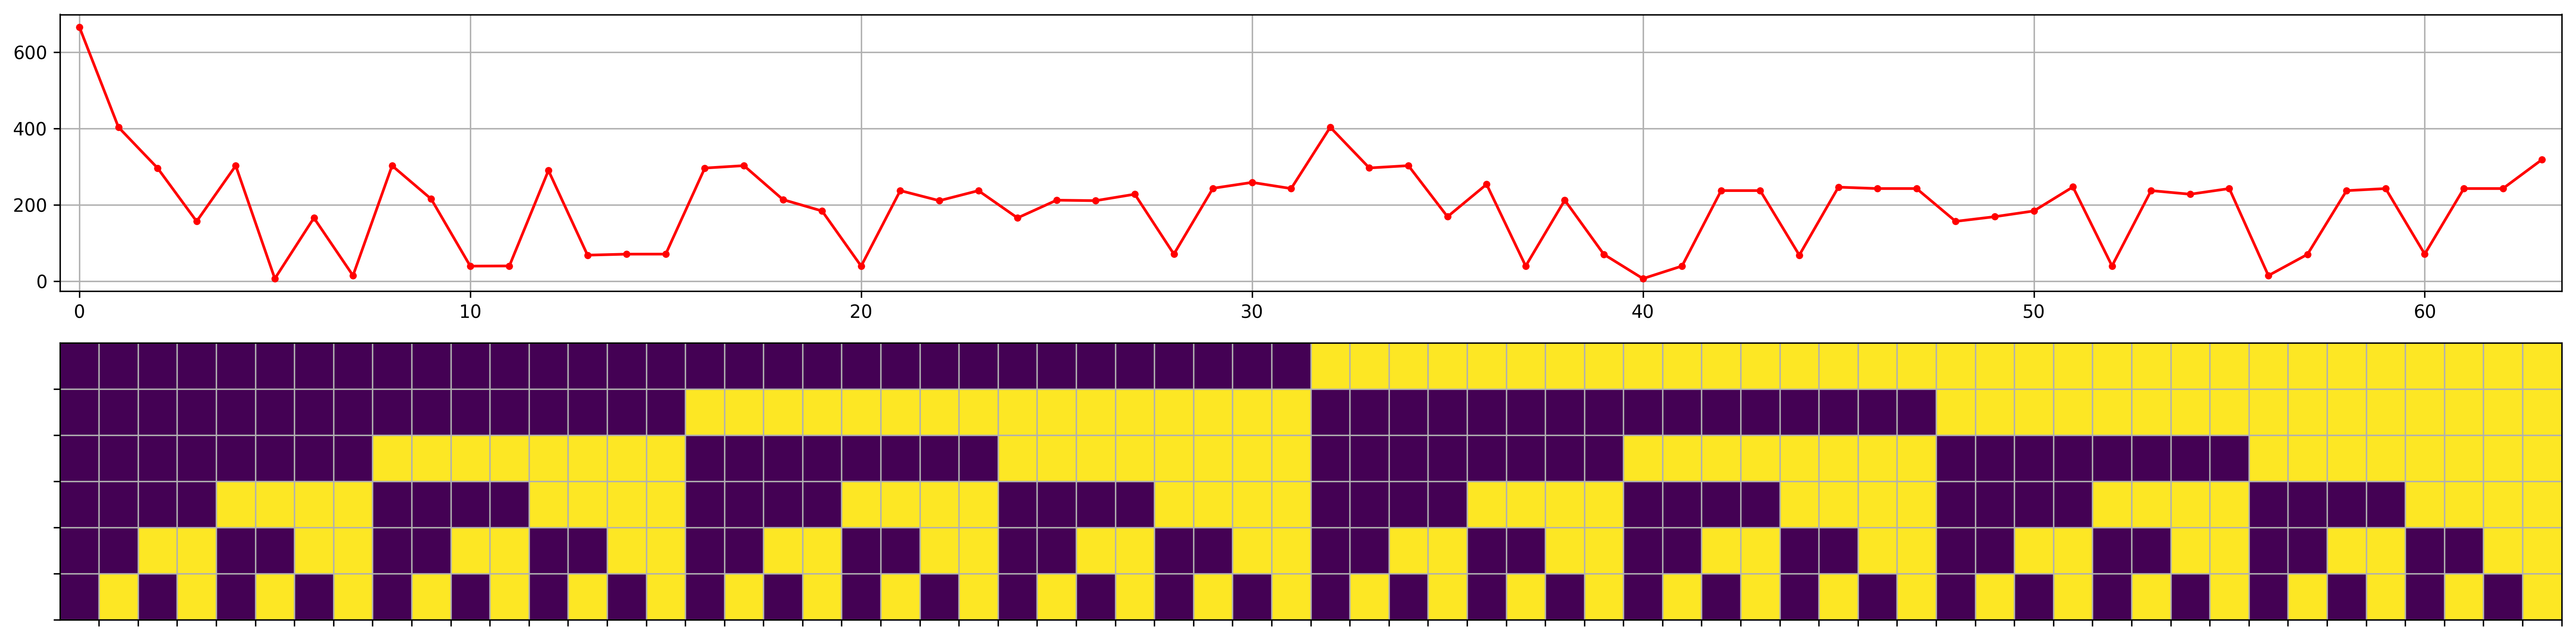

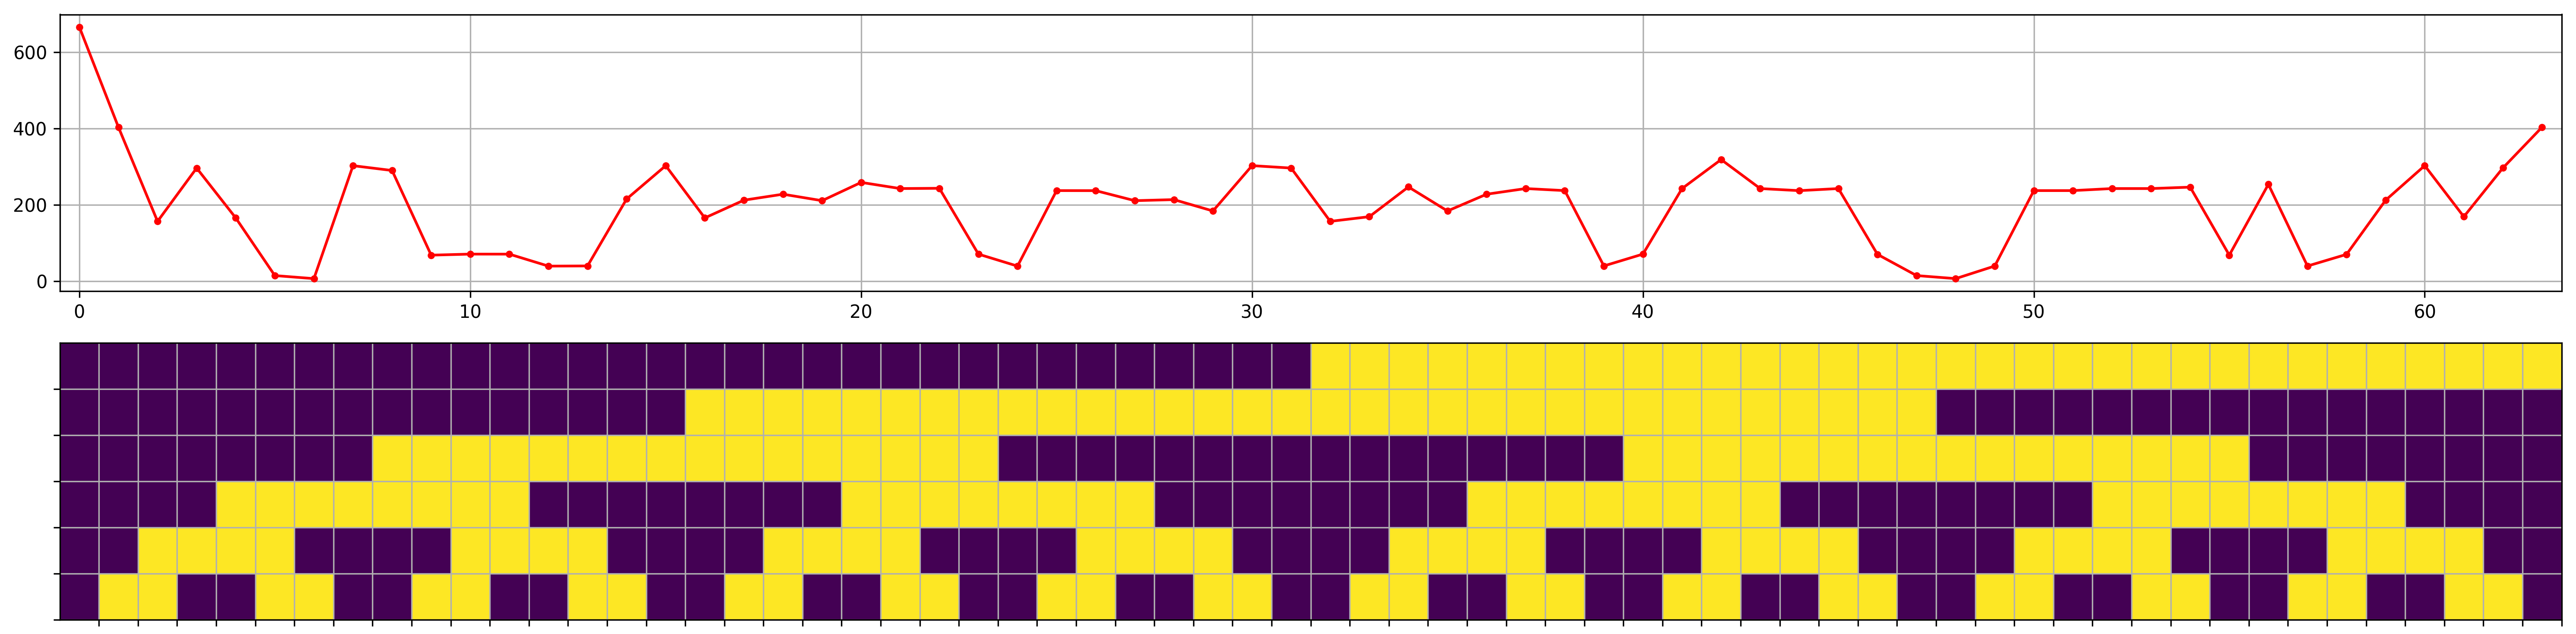

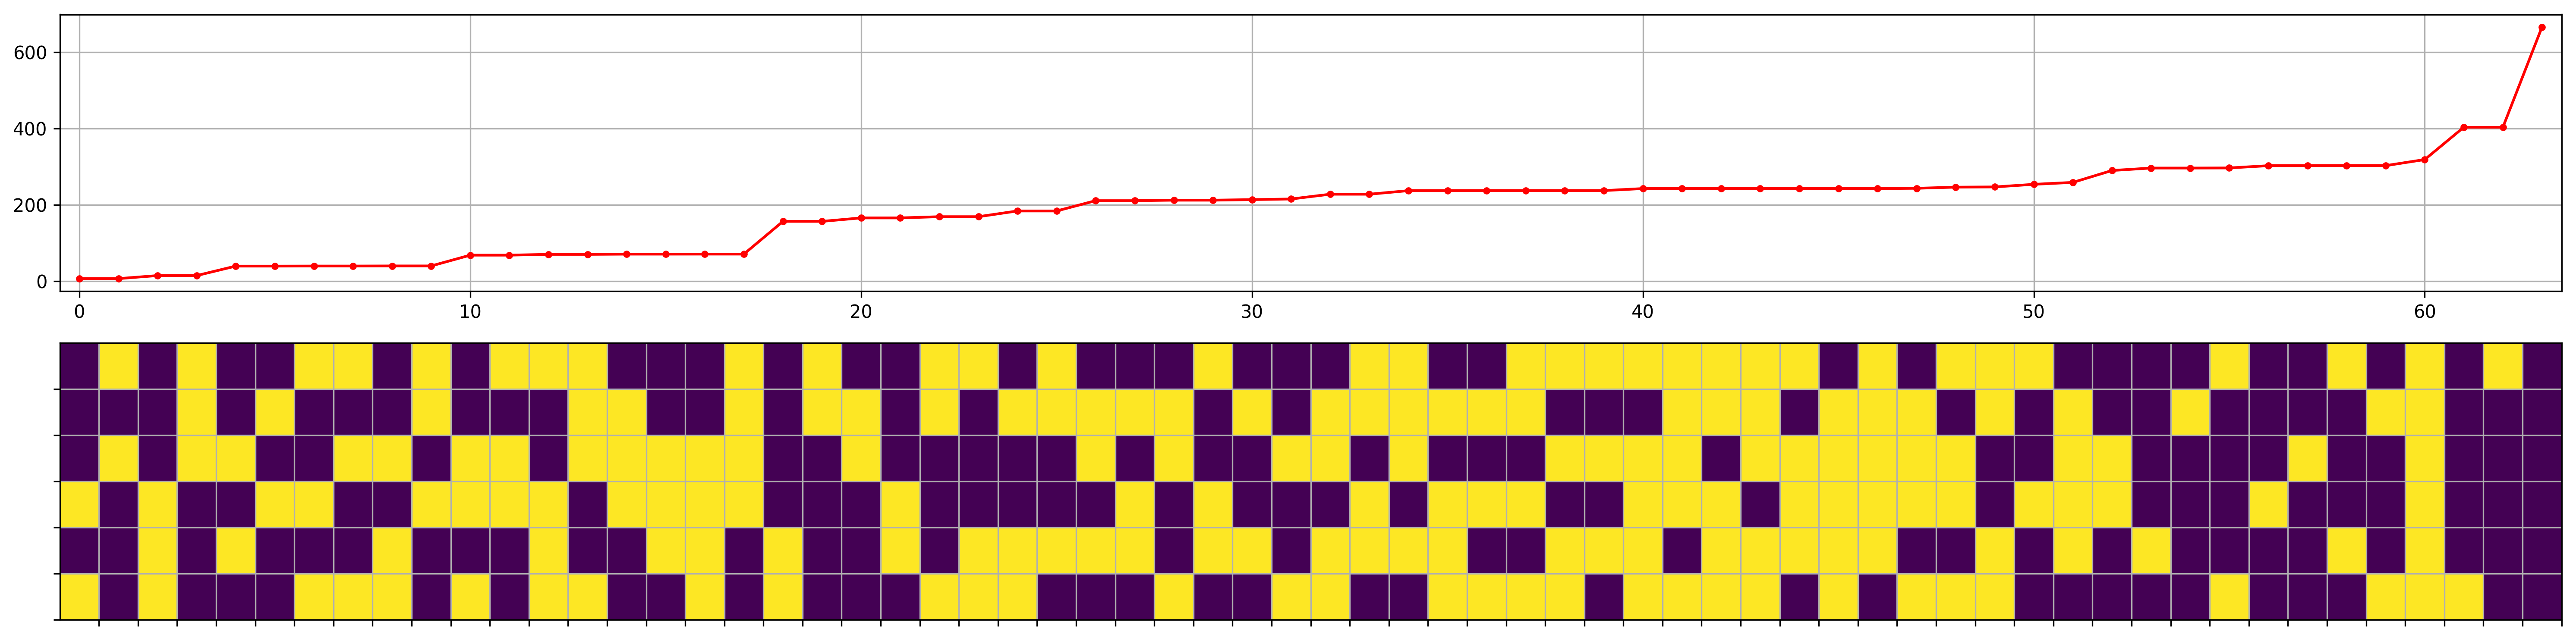

In [271]:
currents_plot(6, list(conf6_values.values()), list(conf6_values.keys()))
currents_plot(6, list(conf6_values_gray.values()), list(conf6_values_gray.keys()))
currents_plot(6, list(conf6_values_sorted.values()), list(conf6_values_sorted.keys()))

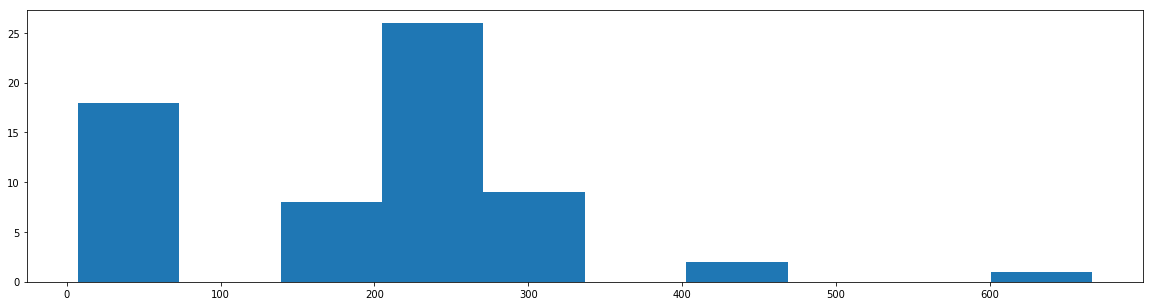

In [20]:
plt.figure(figsize=(20, 5))
plt.hist(values6_num)
plt.show()

In [134]:
save_data(6, values=values6_num, conf=conf6)

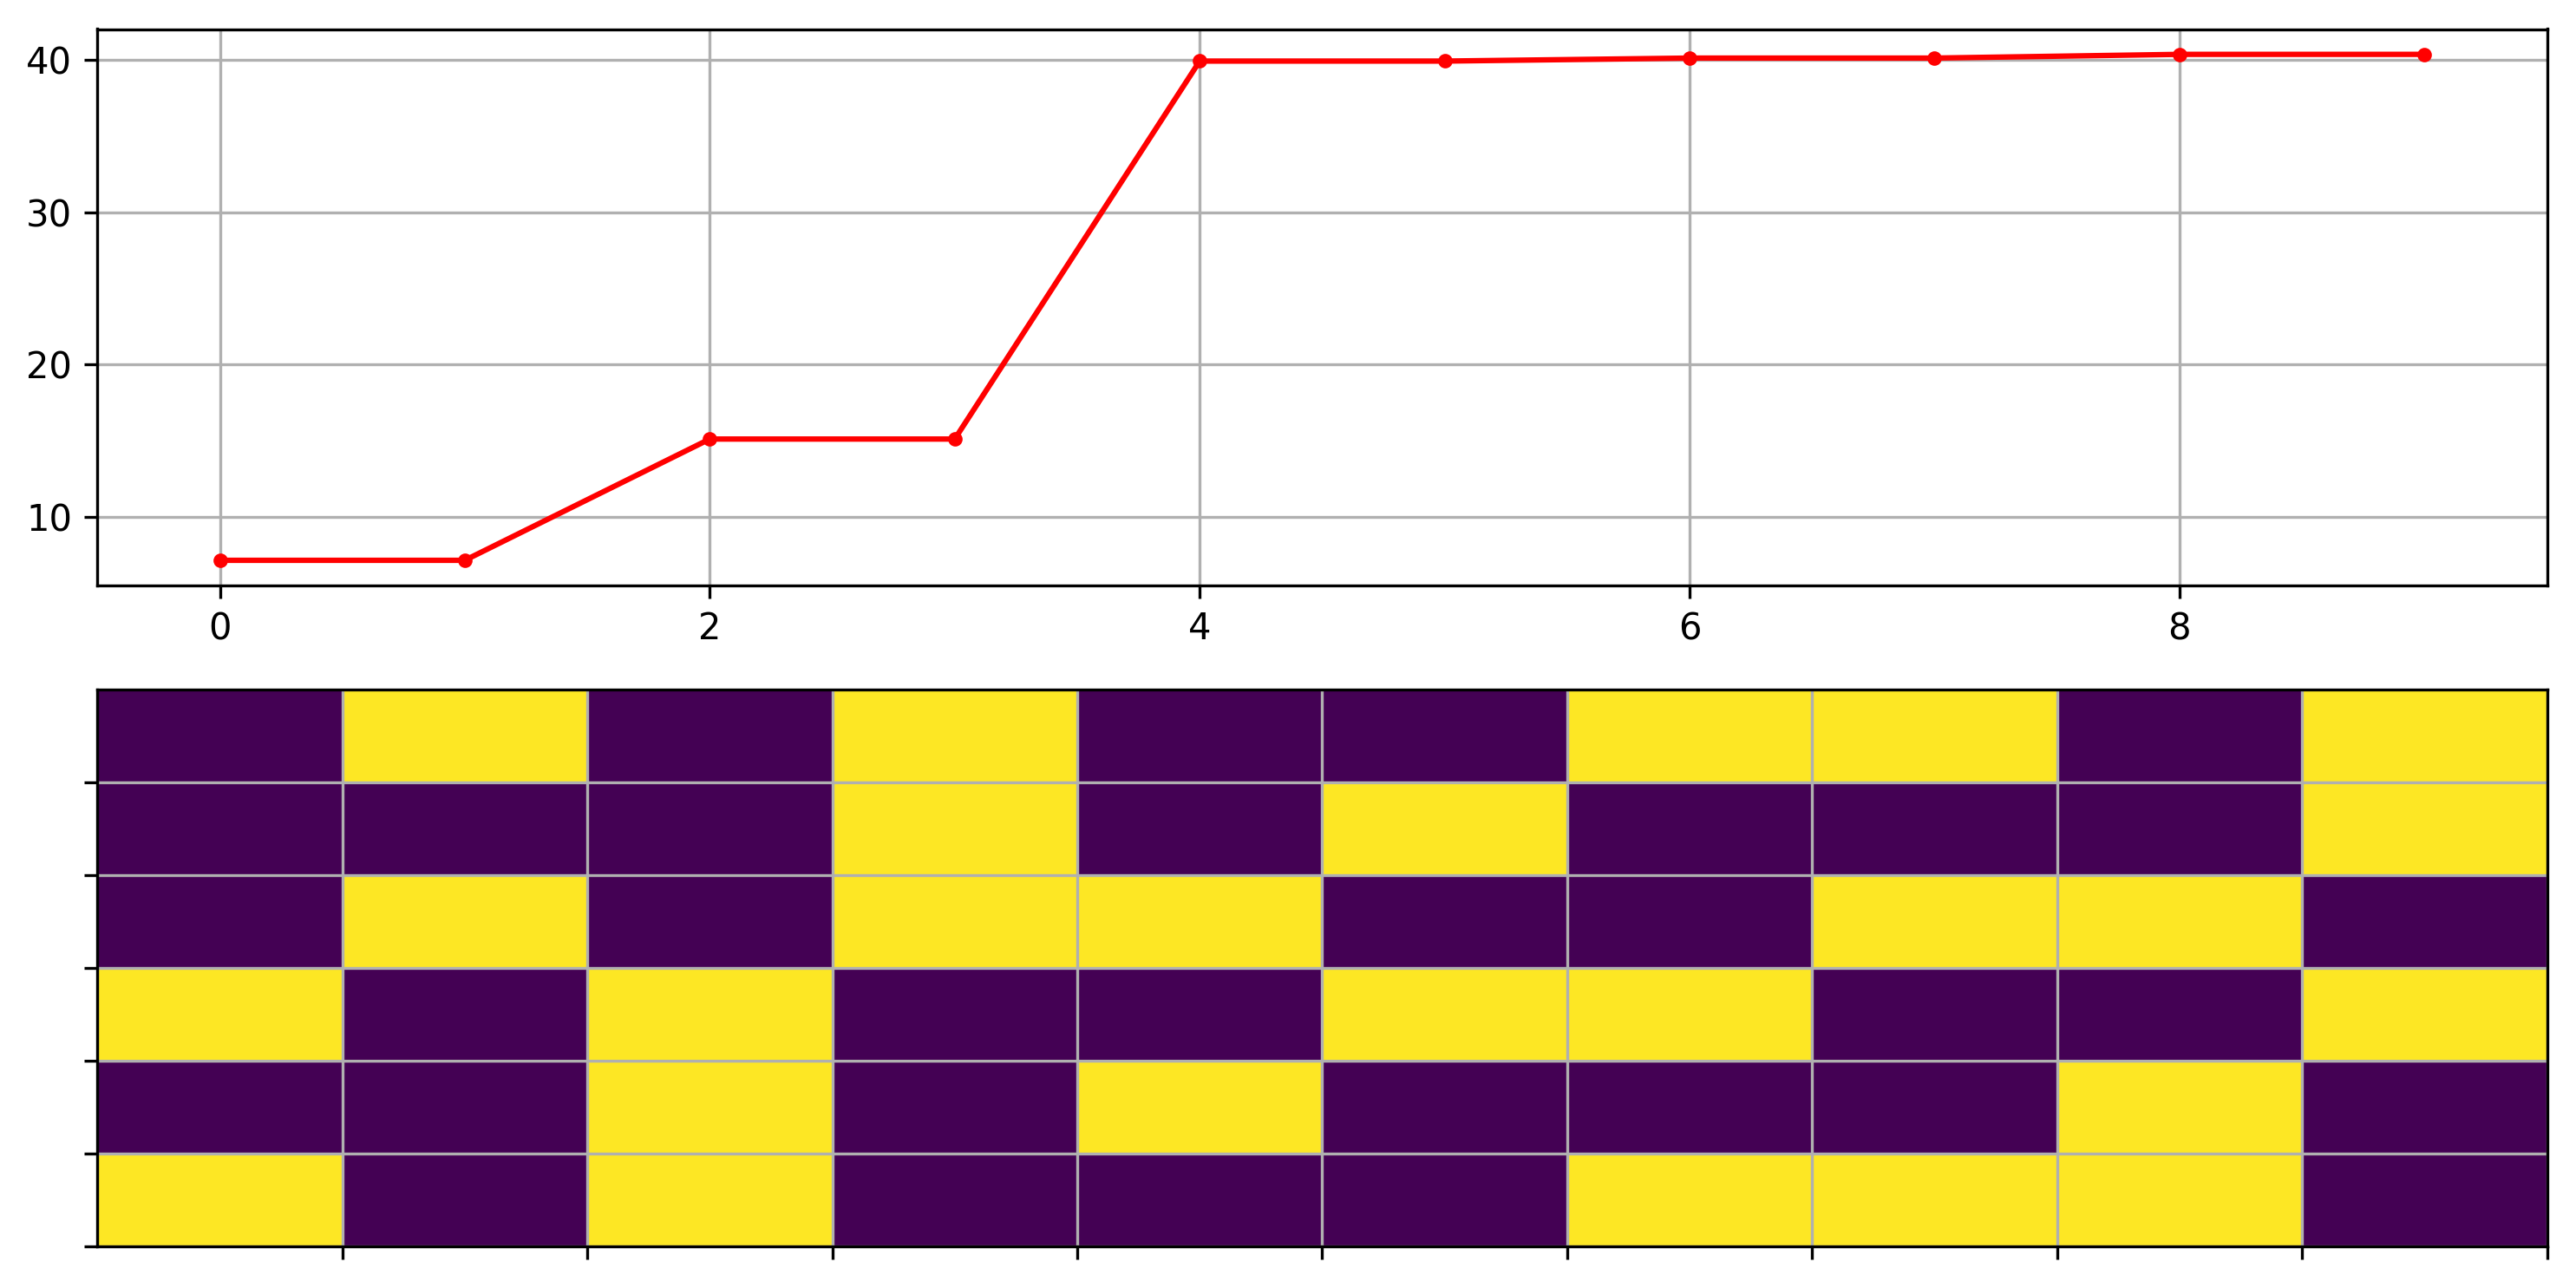

In [306]:
currents_plot(6, 
              list(conf6_values_sorted.values())[:10], 
              list(conf6_values_sorted.keys())[:10], 
              figsize=(10, 5), 
              suffix='top10')

## 7 currents - possible solutions

In [21]:
# values7, conf7 = compute_possible_conf(7)
values7_num, conf7 = compute_possible_conf(7, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values7_num)}")

  2%|▏         | 2/128 [00:01<00:56,  2.22it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 128/128 [01:28<00:00,  1.02it/s]

obj function value for the optimal configuration: 12.697357287156352


In [272]:
conf7_values = get_conf_dict(values7_num, conf7)
conf7_values_gray = gray_code_repr(conf7_values)
conf7_values_sorted = sorted_repr(conf7_values)

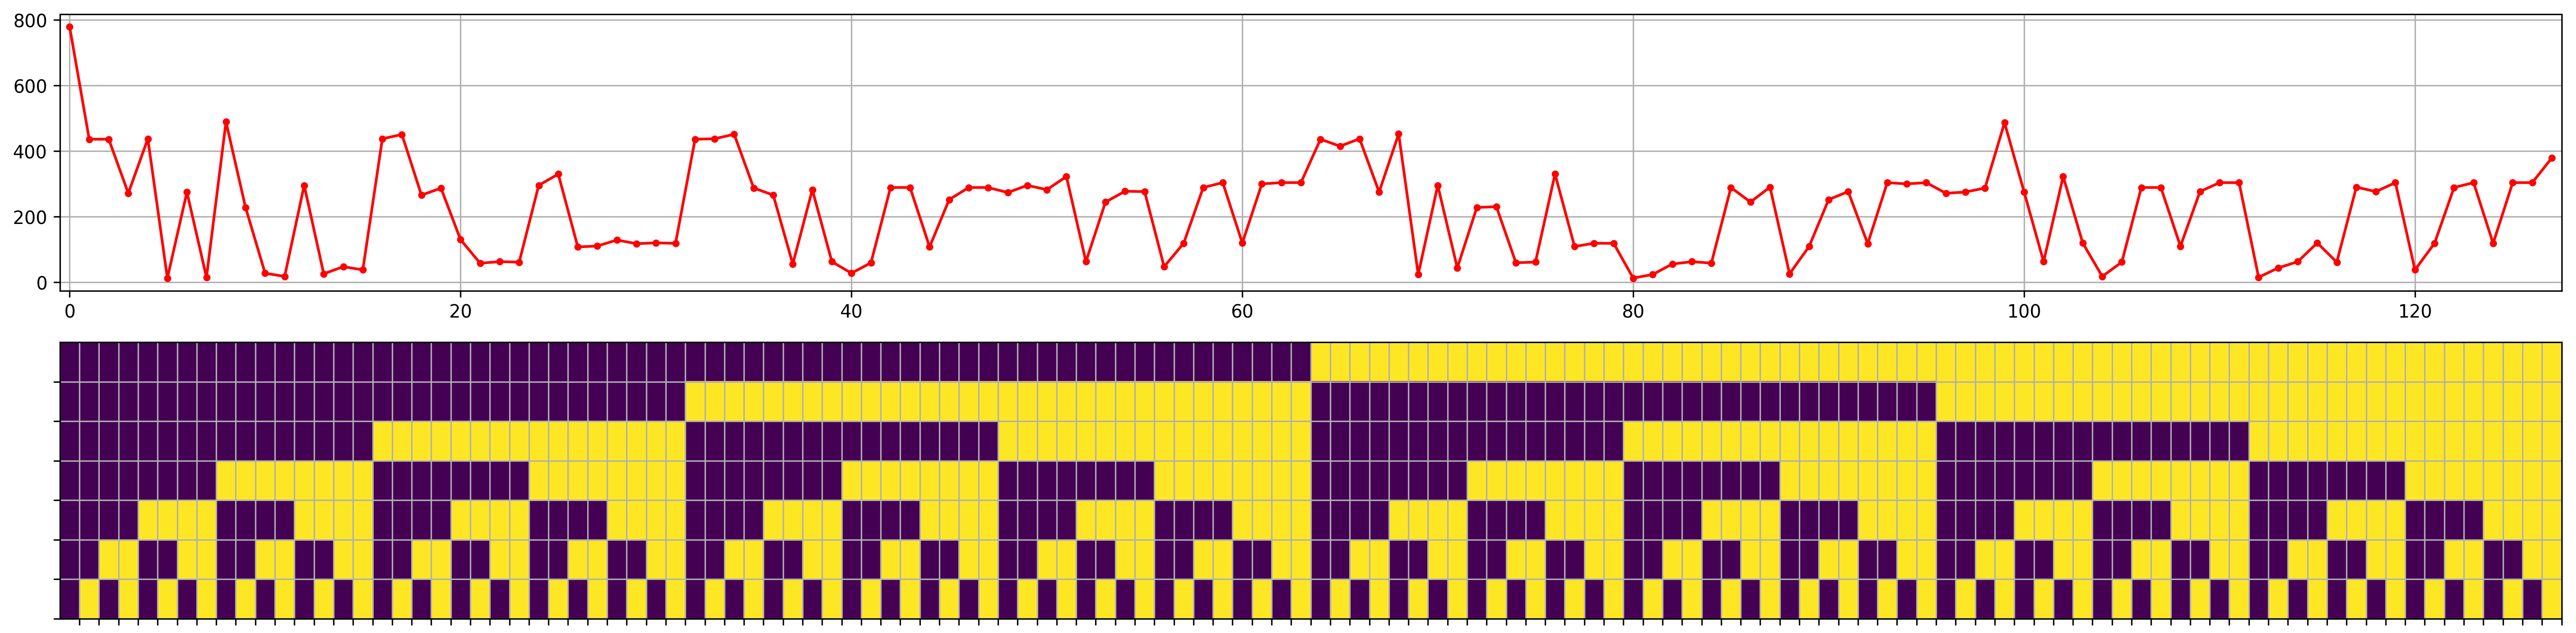

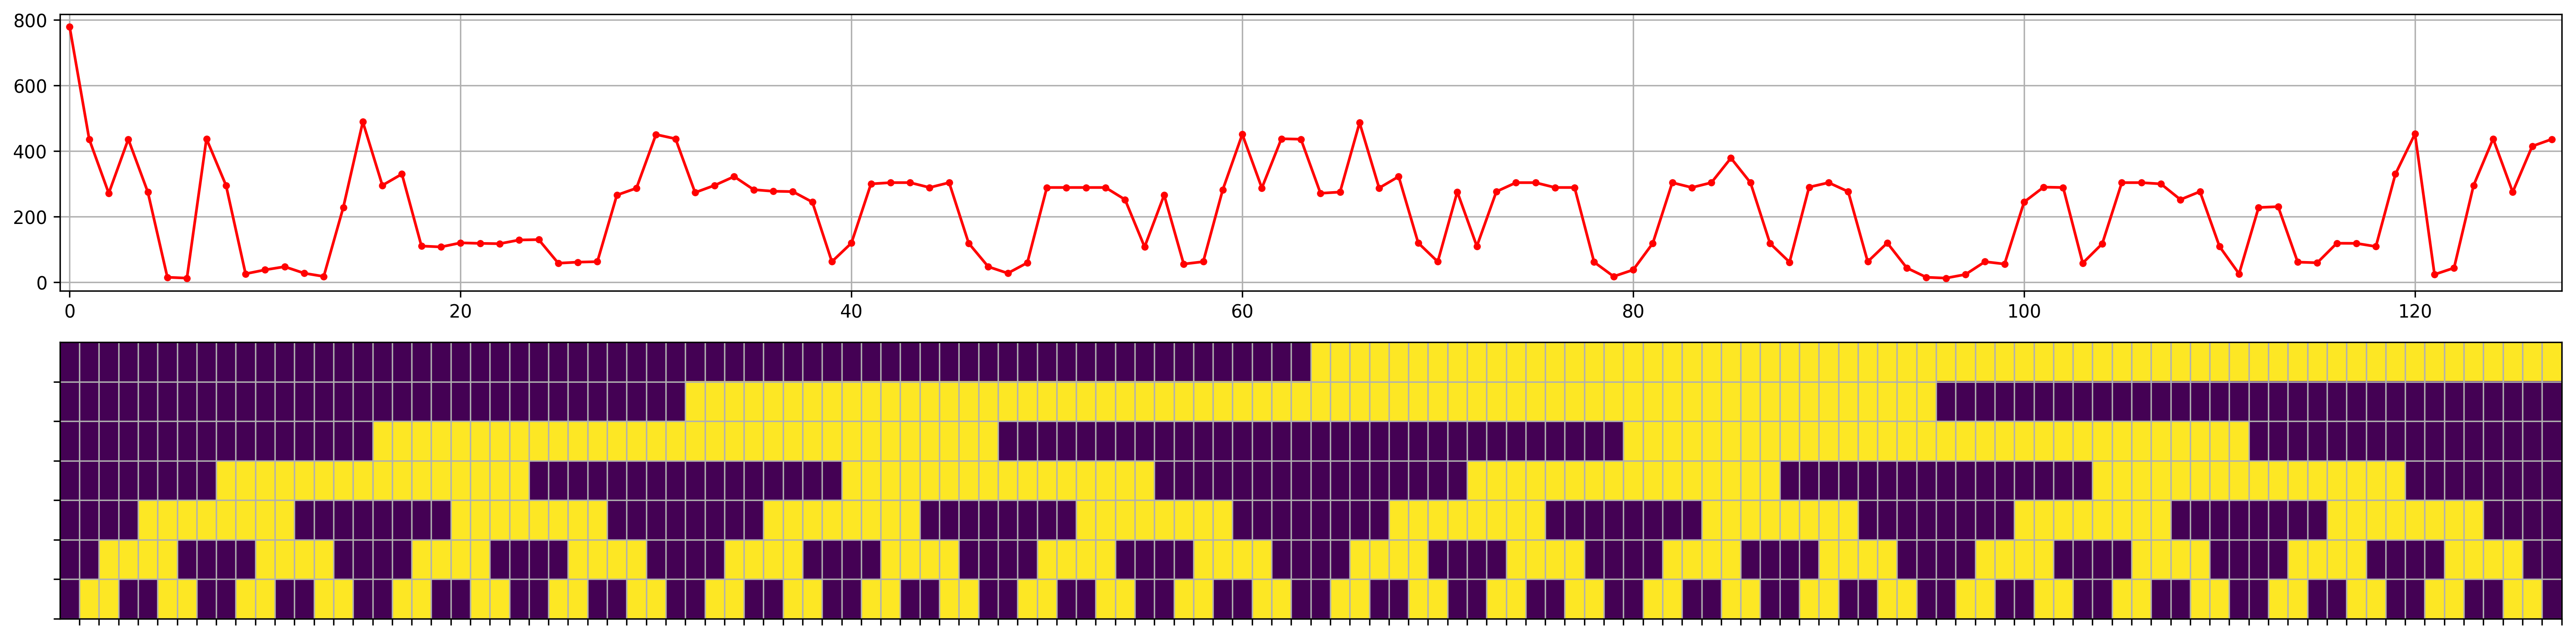

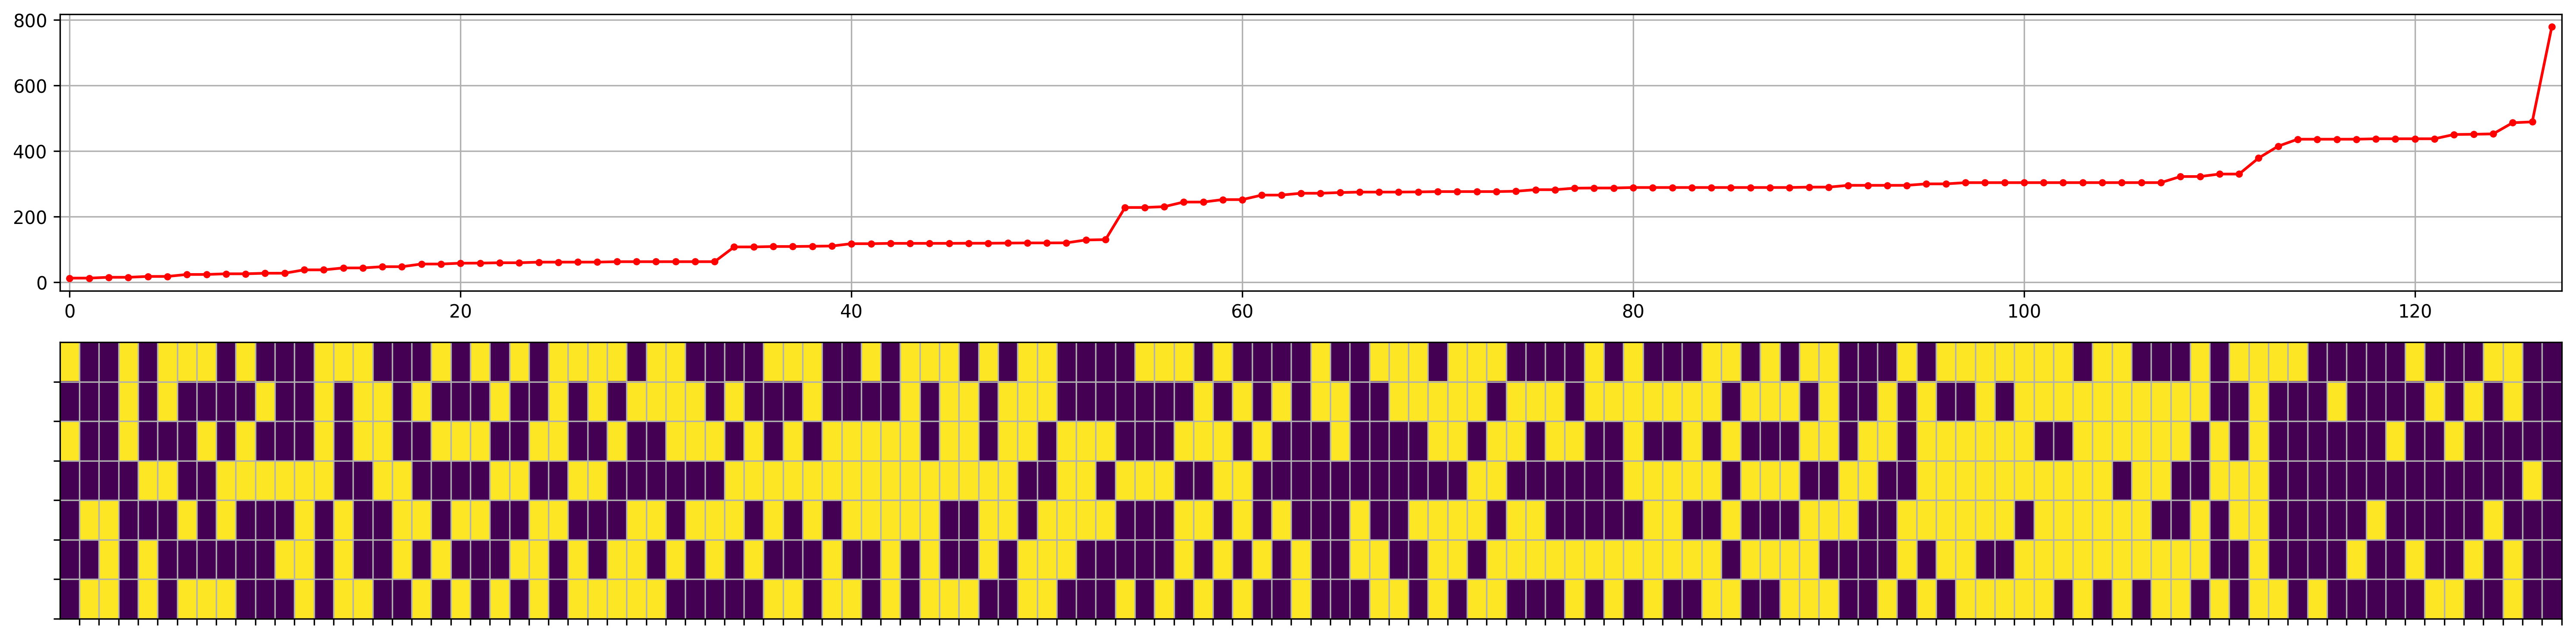

In [273]:
currents_plot(7, list(conf7_values.values()), list(conf7_values.keys()))
currents_plot(7, list(conf7_values_gray.values()), list(conf7_values_gray.keys()))
currents_plot(7, list(conf7_values_sorted.values()), list(conf7_values_sorted.keys()))

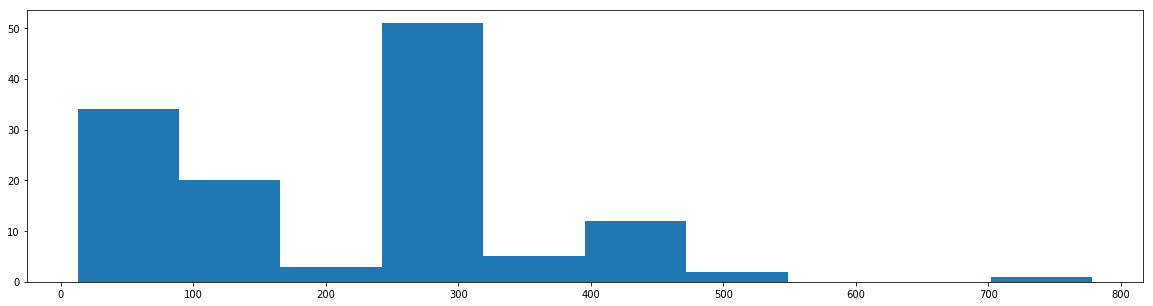

In [24]:
plt.figure(figsize=(20, 5))
plt.hist(values7_num)
plt.show()

In [135]:
save_data(7, values=values7_num, conf=conf7)

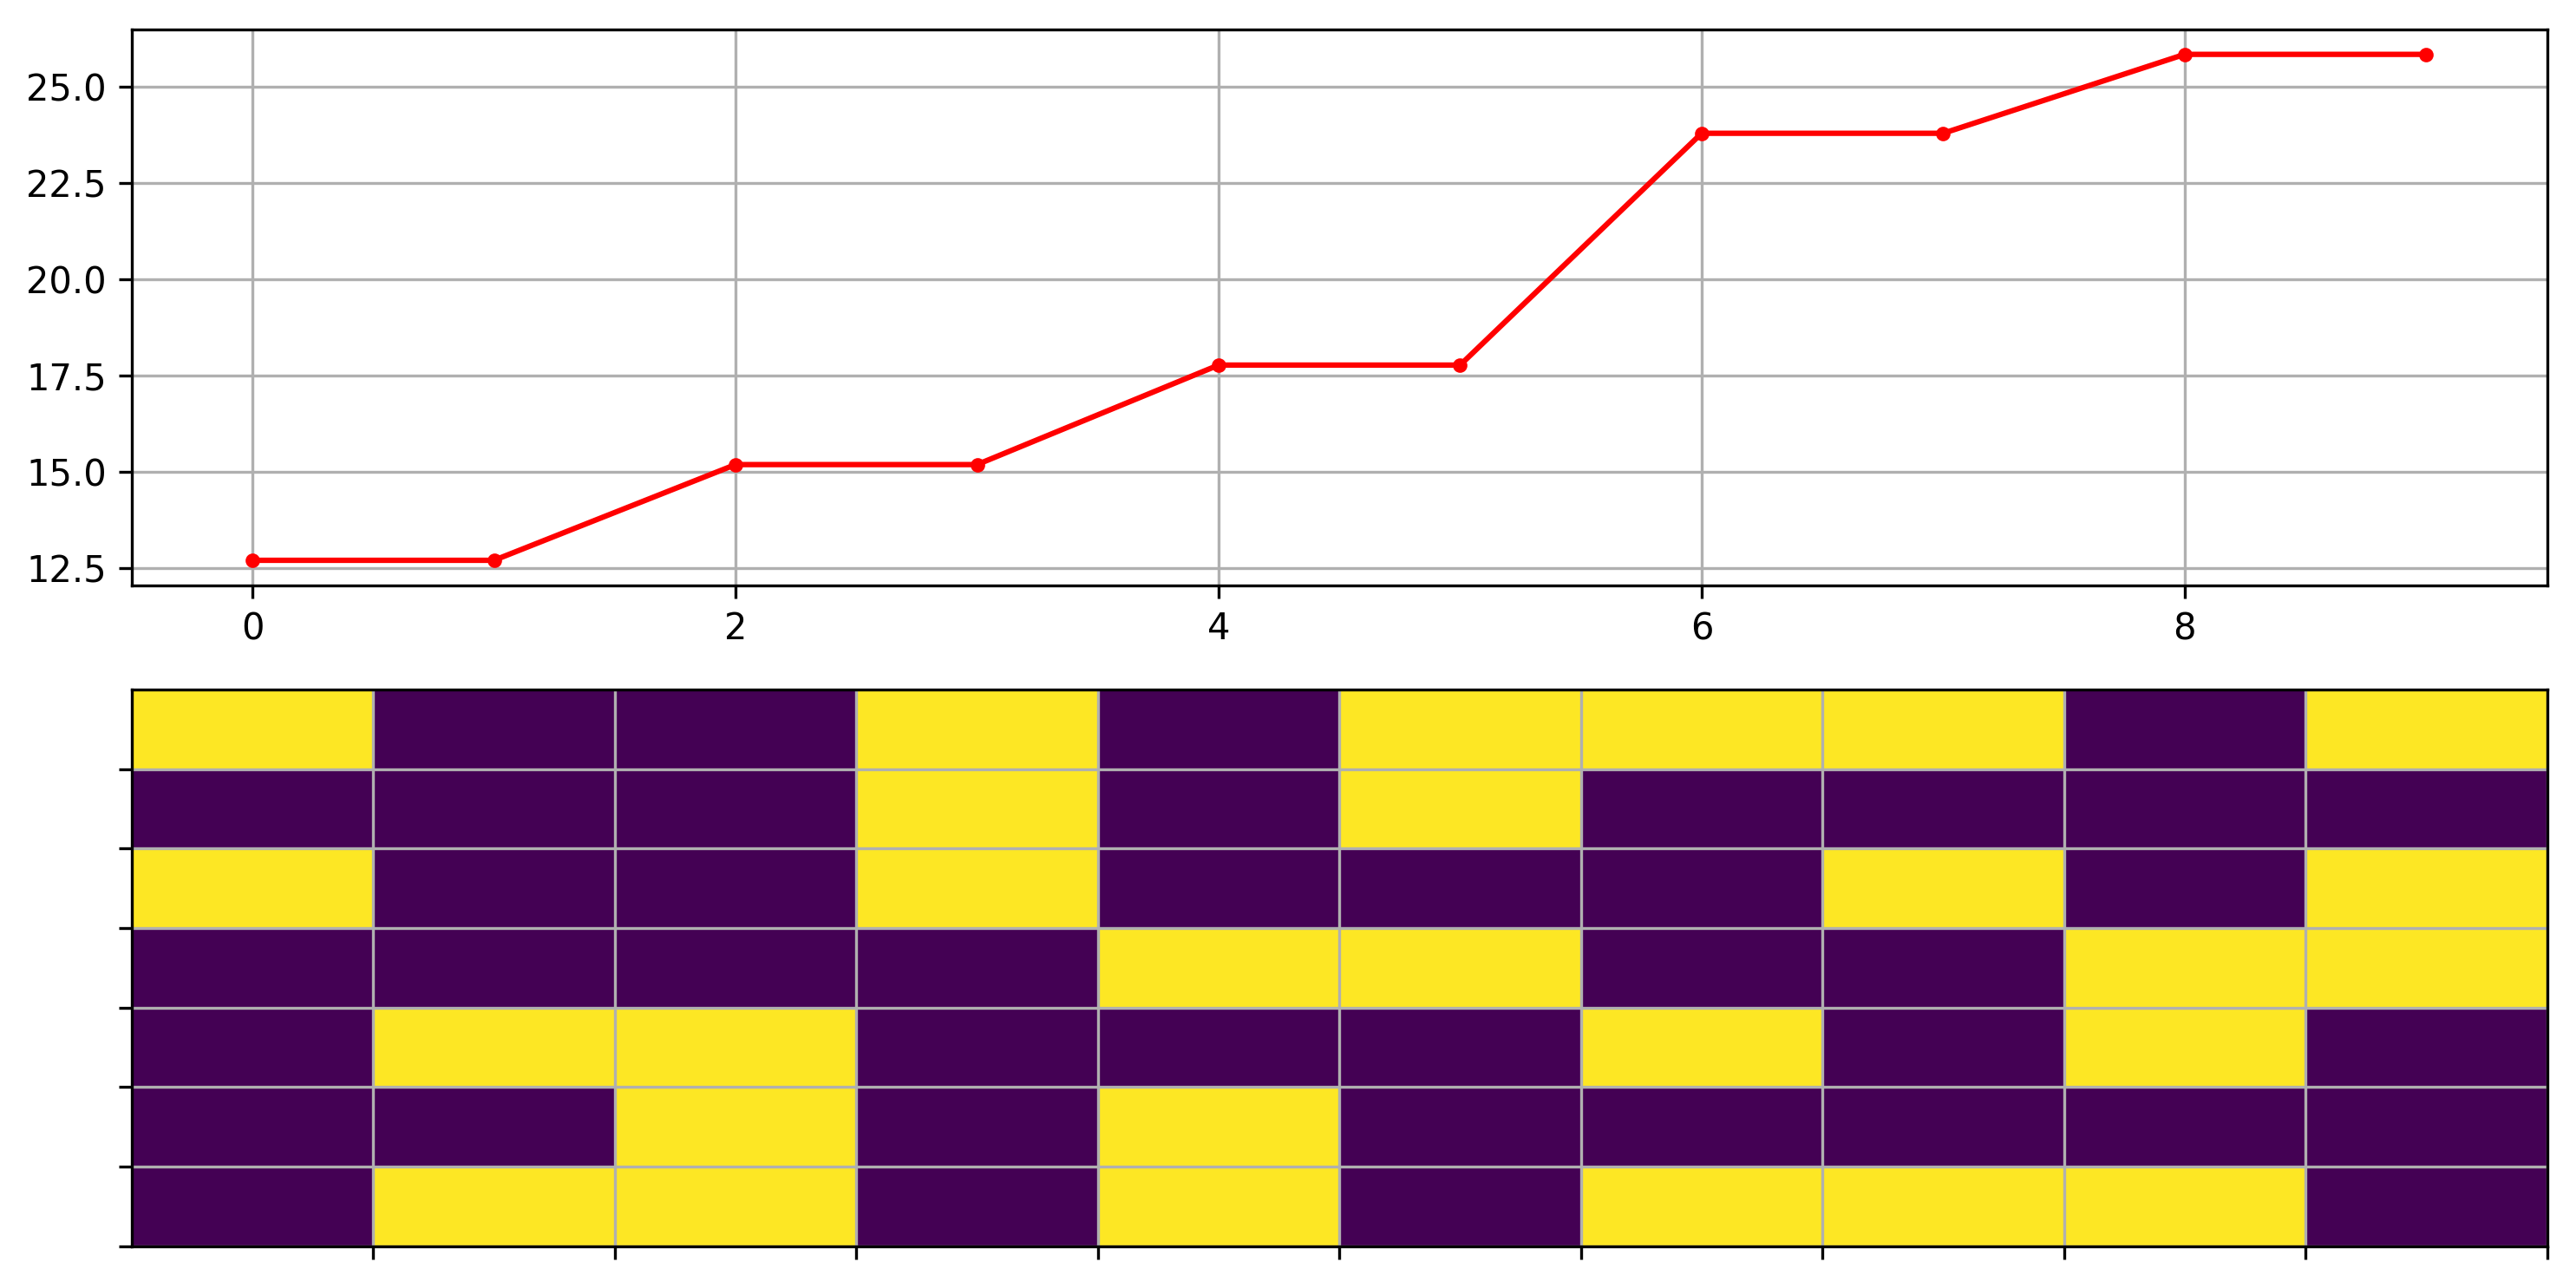

In [305]:
currents_plot(7, list(conf7_values_sorted.values())[:10], list(conf7_values_sorted.keys())[:10], figsize=(10, 5), suffix='top10')

## 8 currents - possible solutions

In [25]:
values8_num, conf8 = compute_possible_conf(8, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values8_num)}")

  0%|          | 0/256 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 256/256 [03:29<00:00,  1.40s/it]

obj function value for the optimal configuration: 12.565339965850072


In [278]:
conf8_values = get_conf_dict(values8_num, conf8)
conf8_values_gray = gray_code_repr(conf8_values)
conf8_values_sorted = sorted_repr(conf8_values)

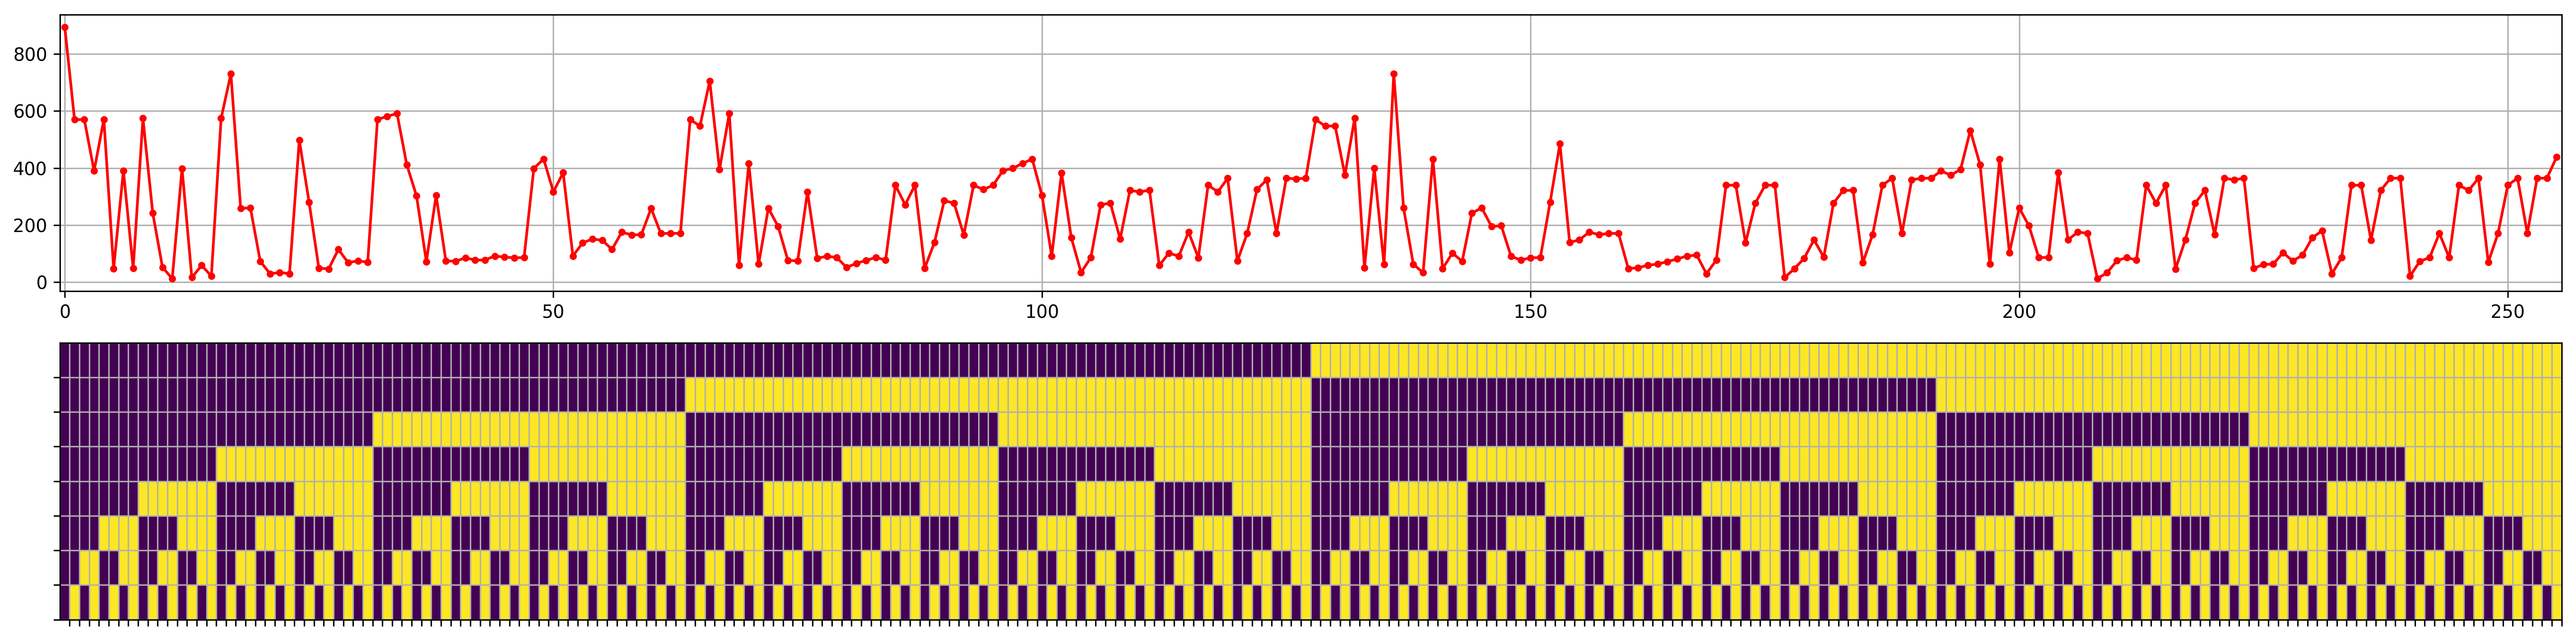

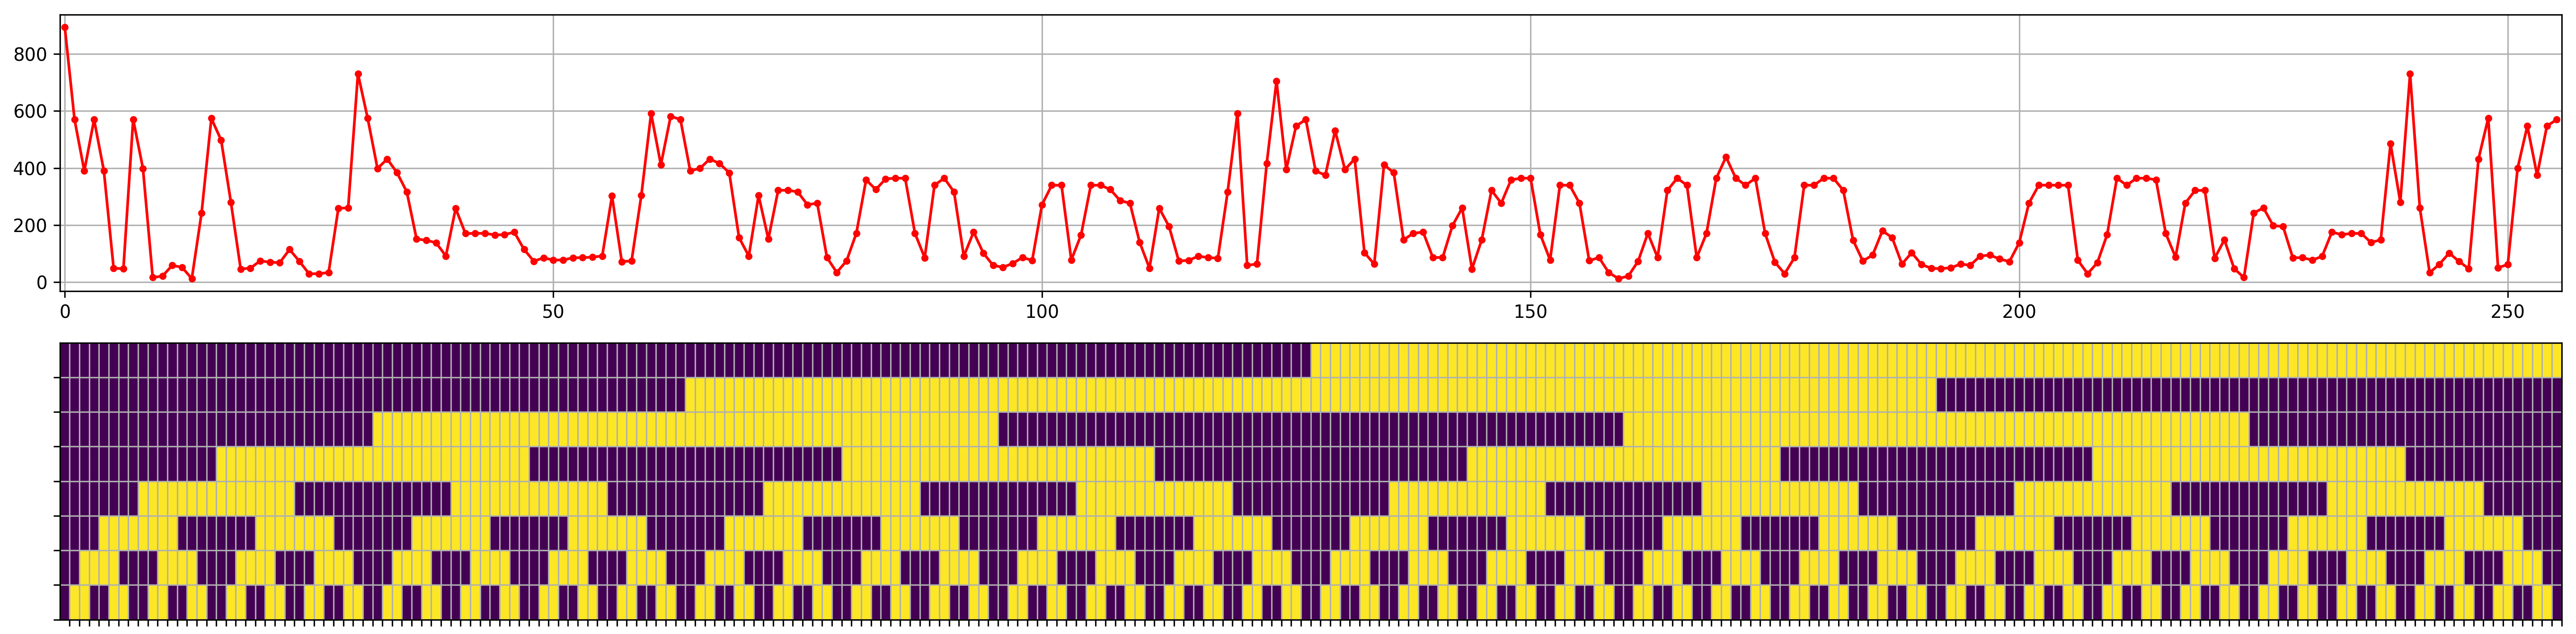

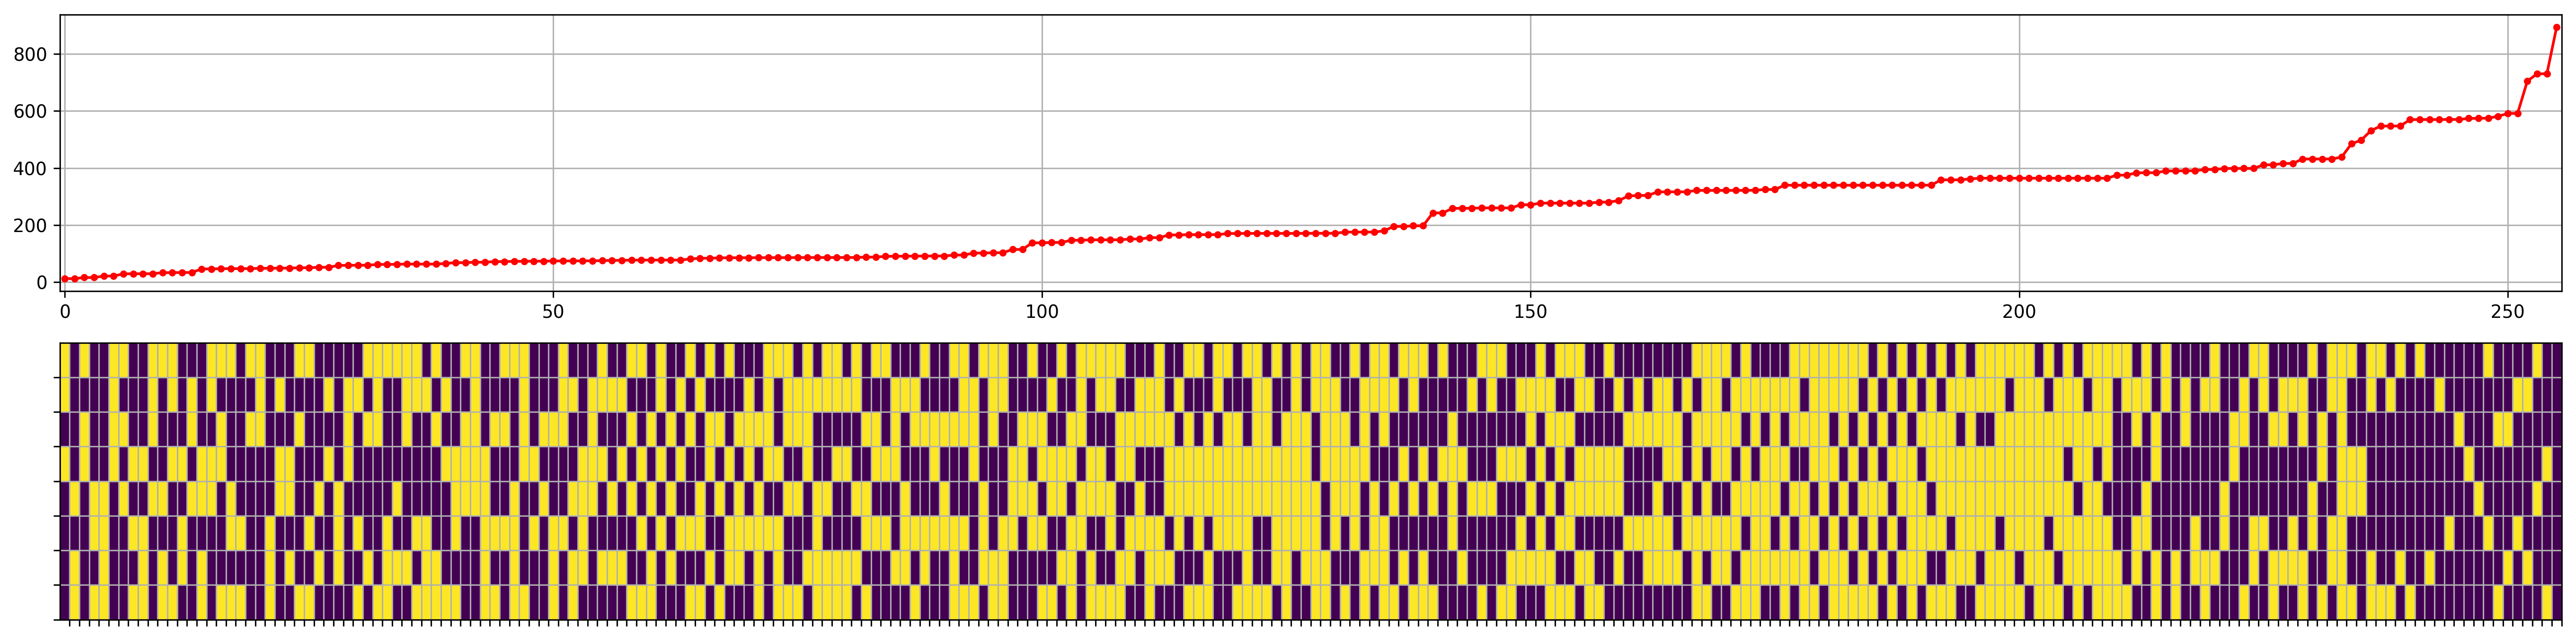

In [279]:
currents_plot(8, list(conf8_values.values()), list(conf8_values.keys()), suffix='original')
currents_plot(8, list(conf8_values_gray.values()), list(conf8_values_gray.keys()), suffix='gray')
currents_plot(8, list(conf8_values_sorted.values()), list(conf8_values_sorted.keys()), suffix='sorted')

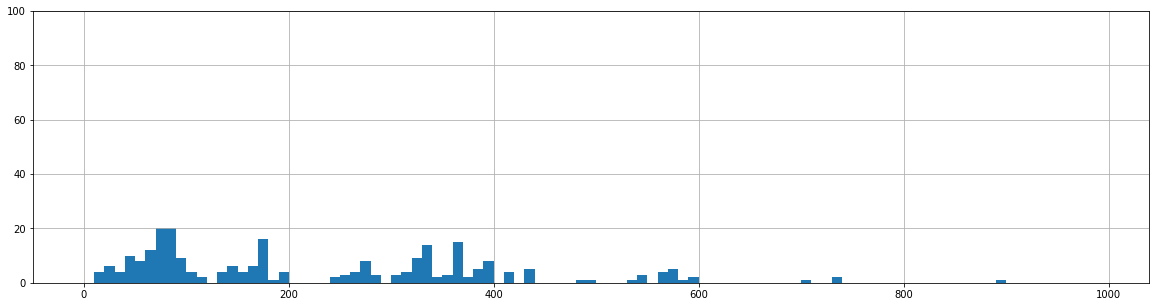

In [42]:
plt.figure(figsize=(20, 5))
plt.hist(values8_num, bins=np.arange(0, 1000, 10))
plt.ylim([0, 100])
plt.grid()
plt.show()

In [136]:
save_data(8, values=values8_num, conf=conf8)

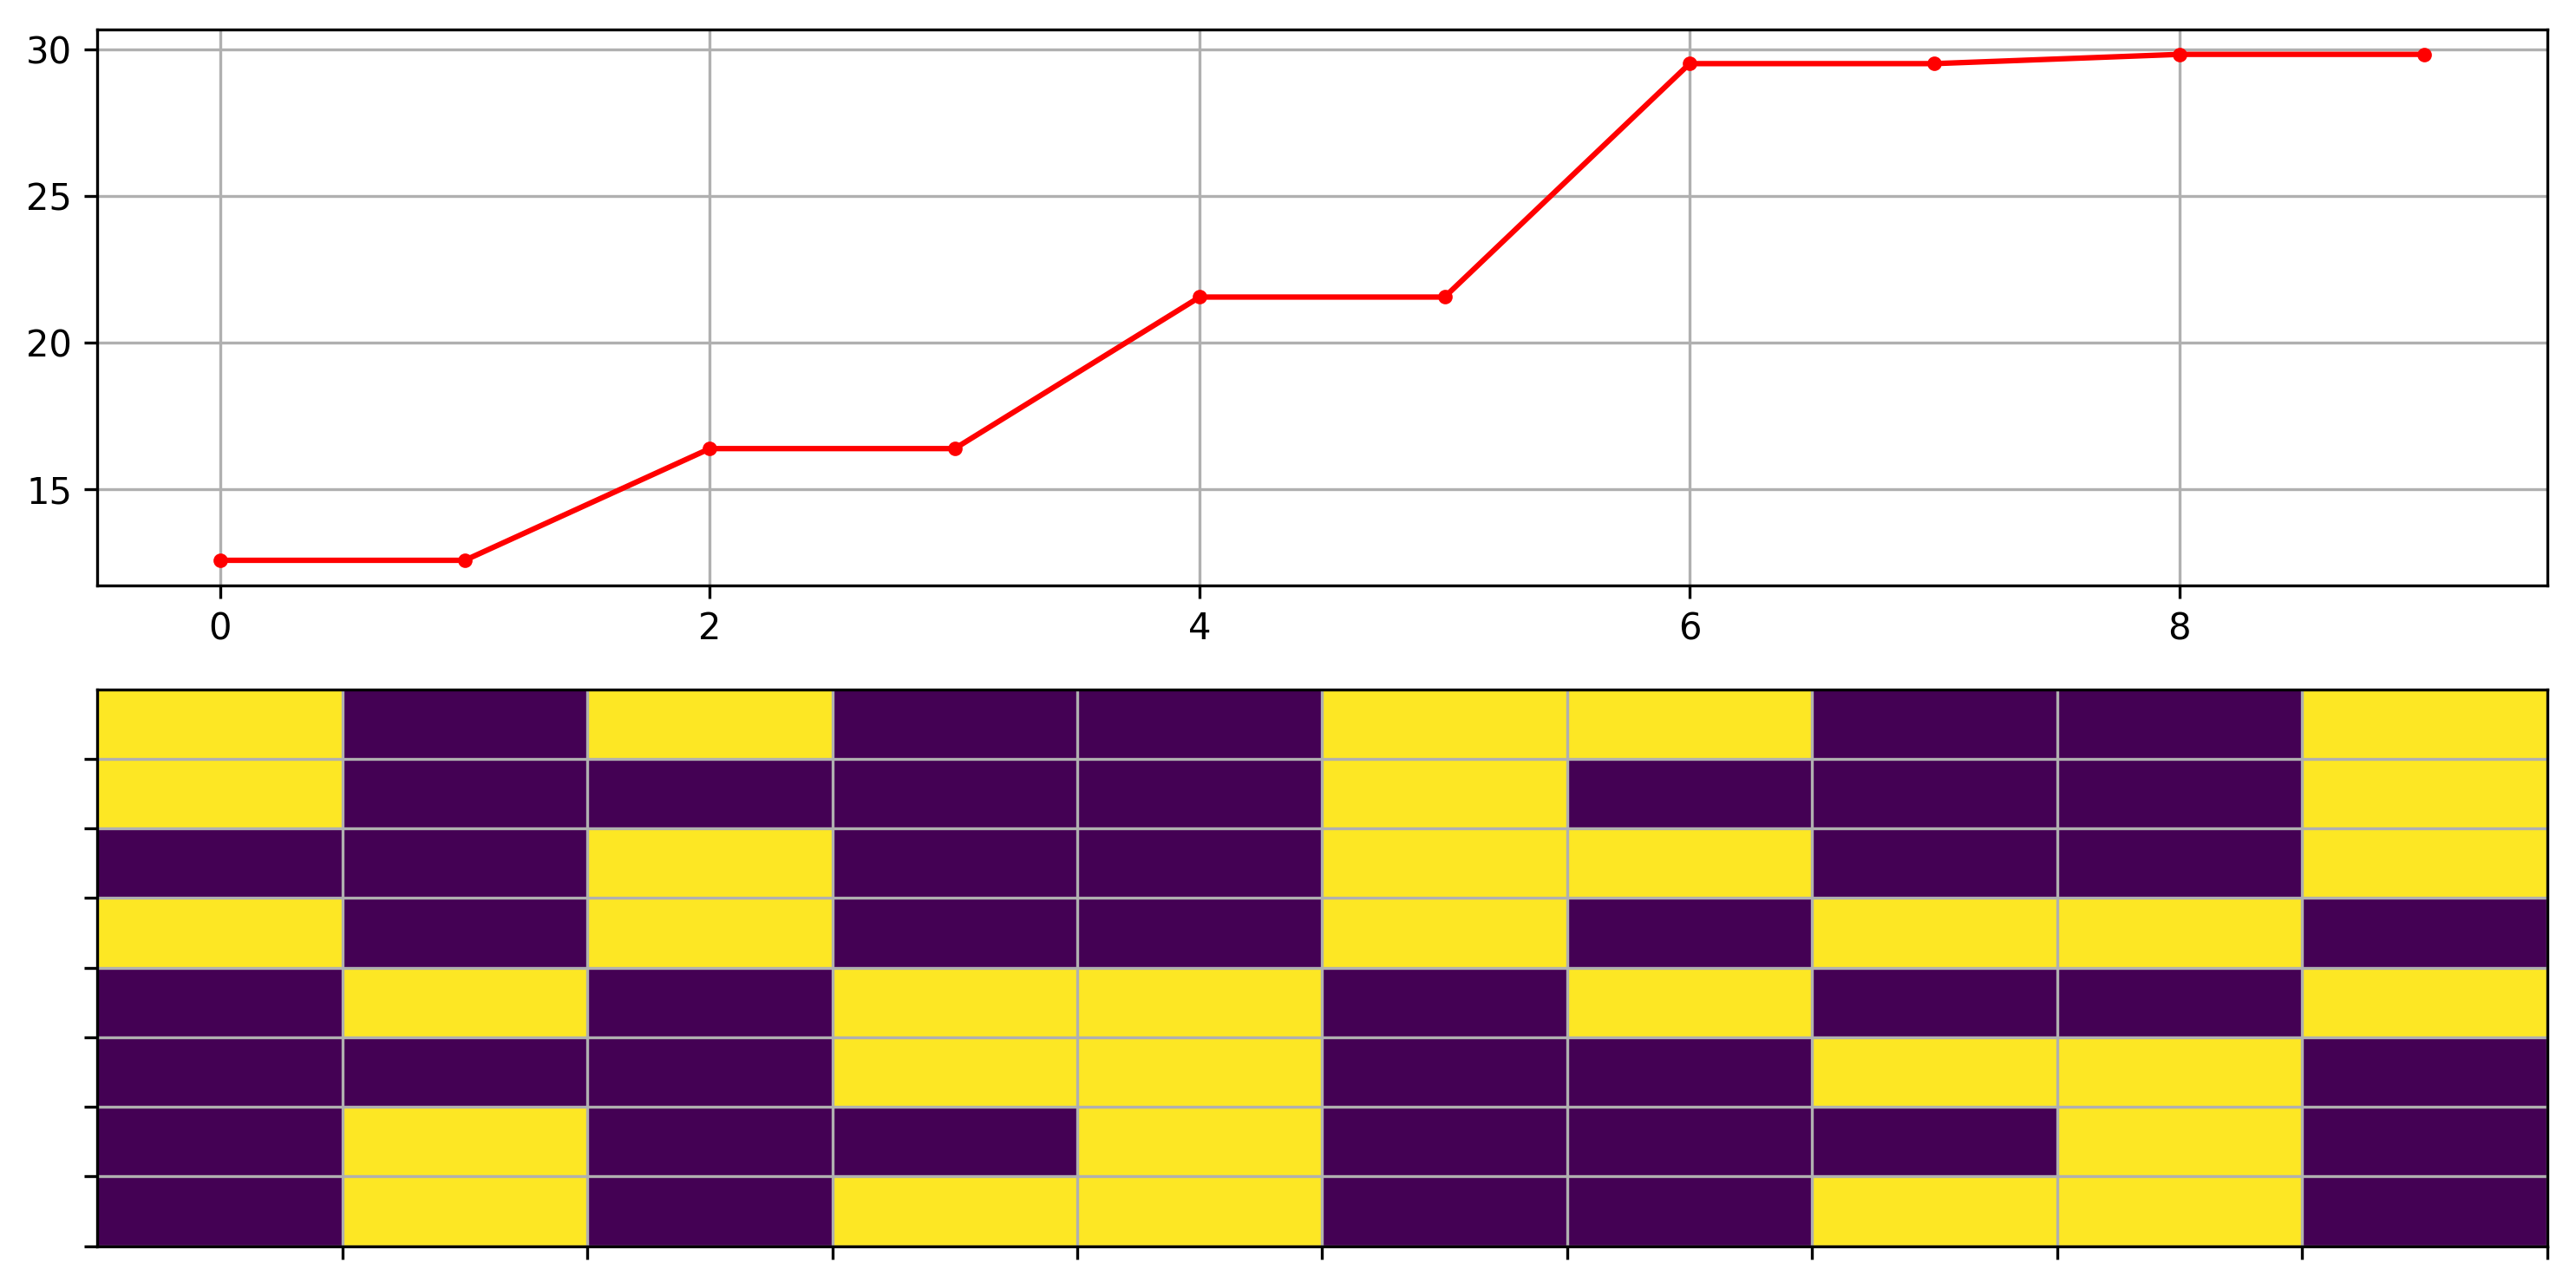

In [302]:
currents_plot(8, list(conf8_values_sorted.values())[:10], list(conf8_values_sorted.keys())[:10], figsize=(10, 5), suffix='top10')

## 9 currents - possible solutions

In [29]:
values9_num, conf9 = compute_possible_conf(9, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values9_num)}")

  1%|          | 3/512 [00:01<03:29,  2.43it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 512/512 [08:51<00:00,  1.90s/it]

obj function value for the optimal configuration: 14.163372174736057


In [280]:
conf9_values = get_conf_dict(values9_num, conf9)
conf9_values_gray = gray_code_repr(conf9_values)
conf9_values_sorted = sorted_repr(conf9_values)

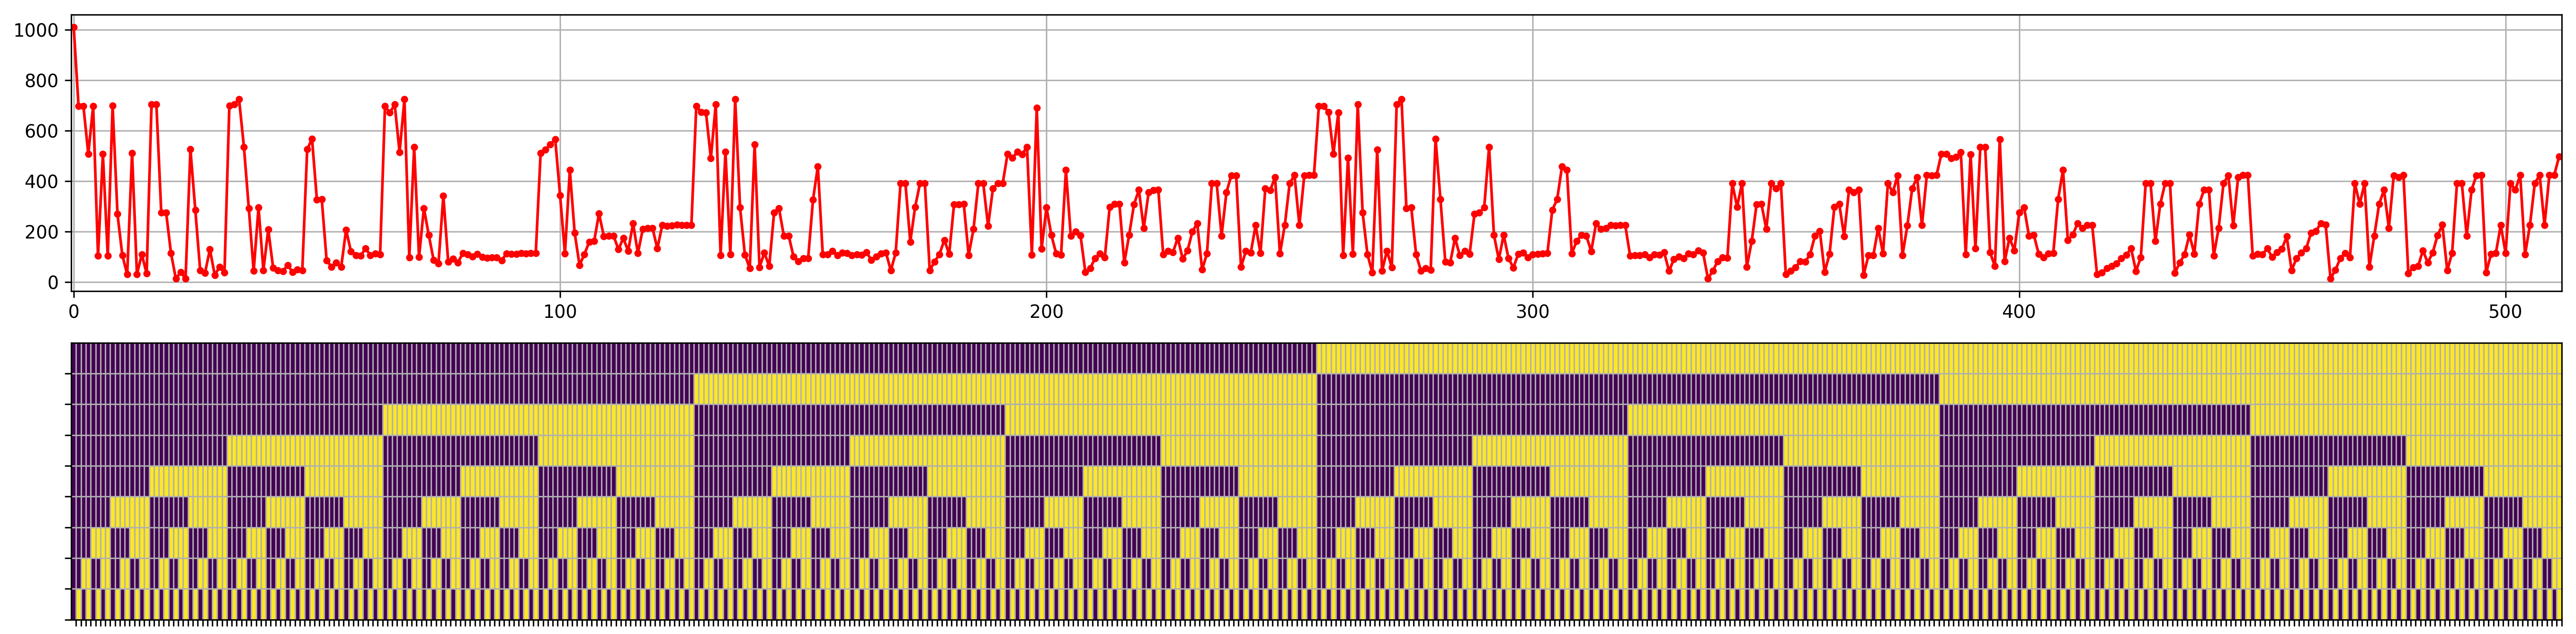

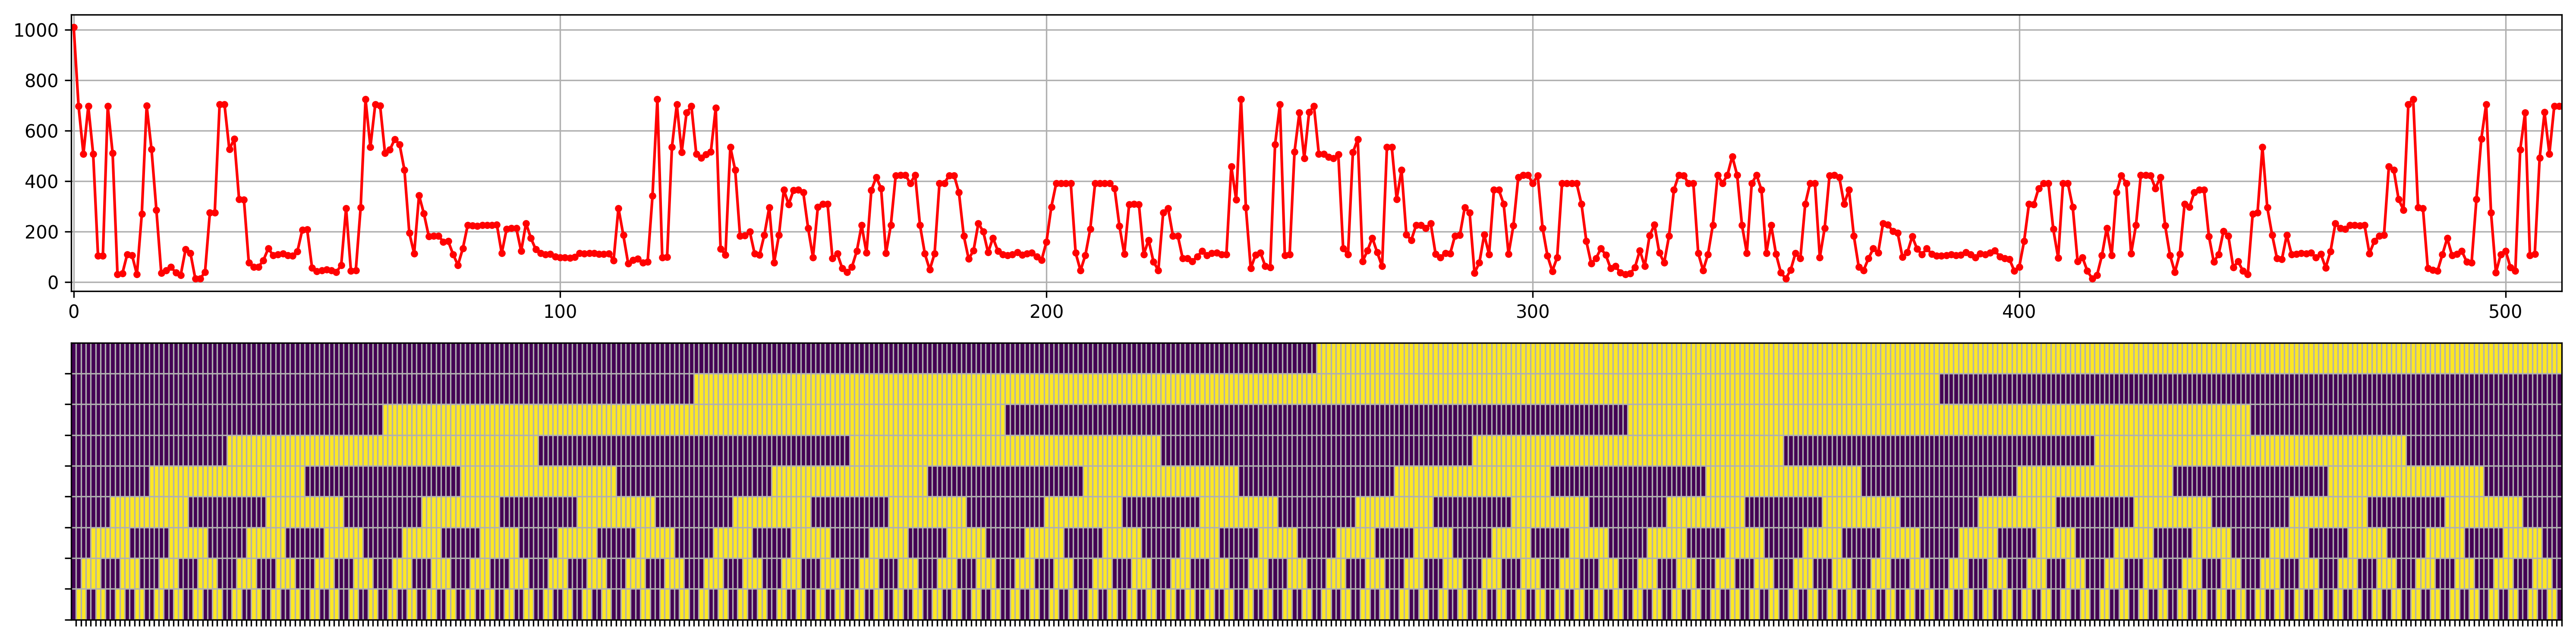

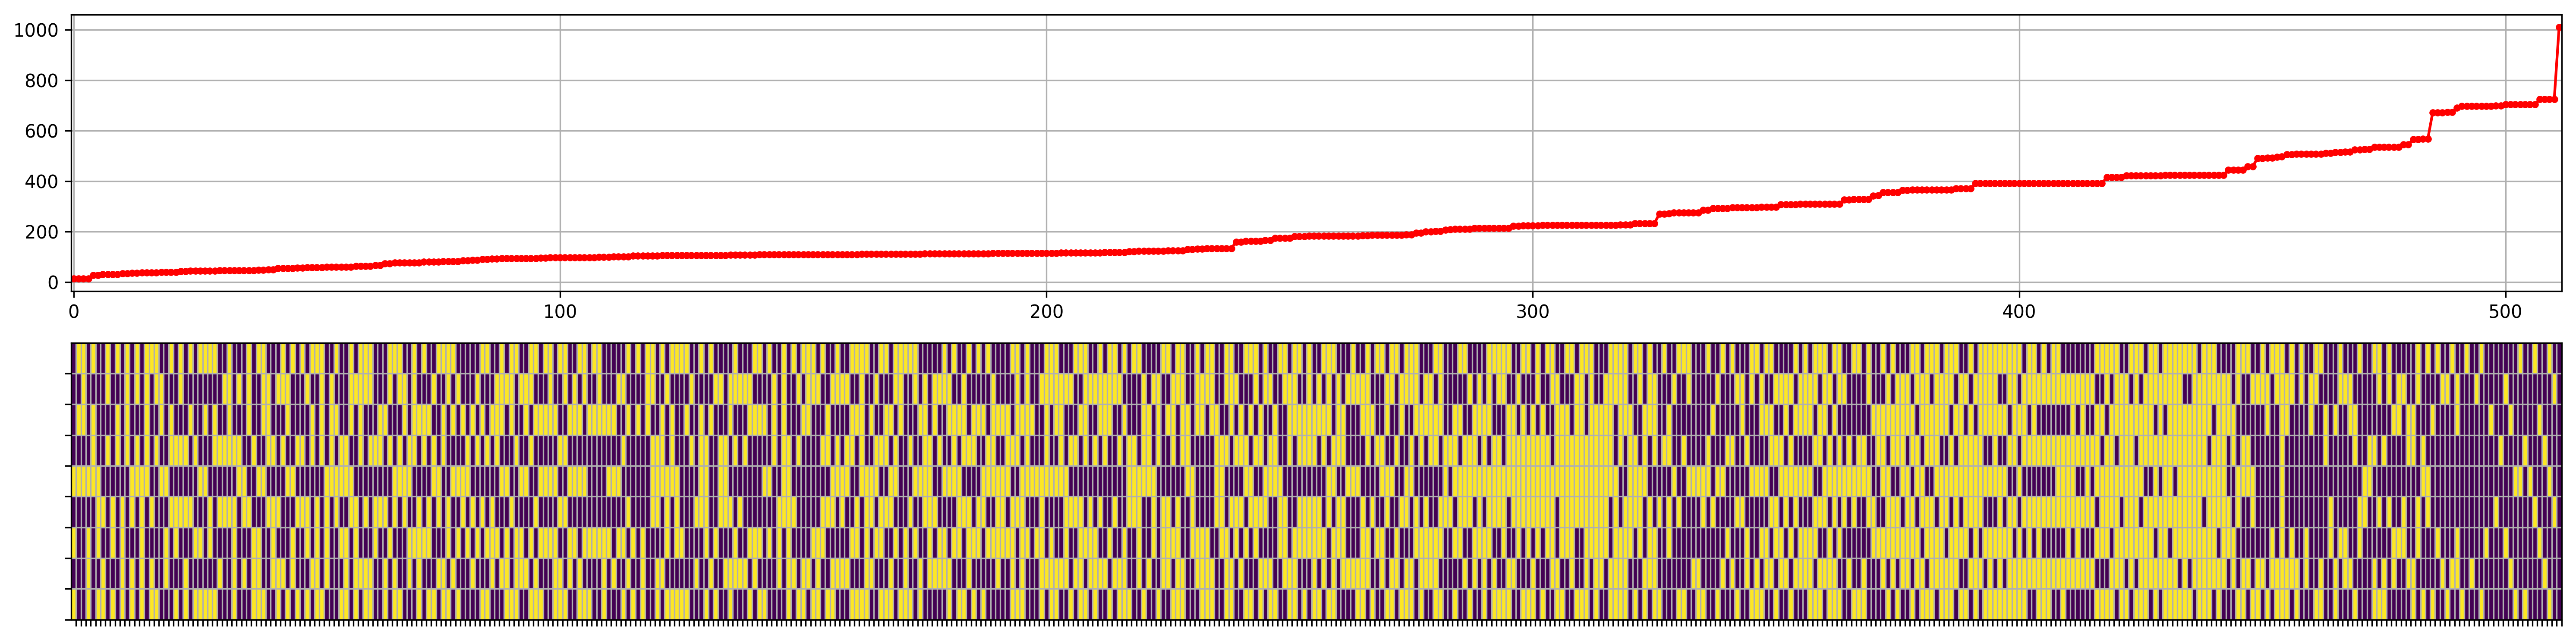

In [281]:
currents_plot(9, list(conf9_values.values()), list(conf9_values.keys()), suffix='original')
currents_plot(9, list(conf9_values_gray.values()), list(conf9_values_gray.keys()), suffix='gray')
currents_plot(9, list(conf9_values_sorted.values()), list(conf9_values_sorted.keys()), suffix='sorted')

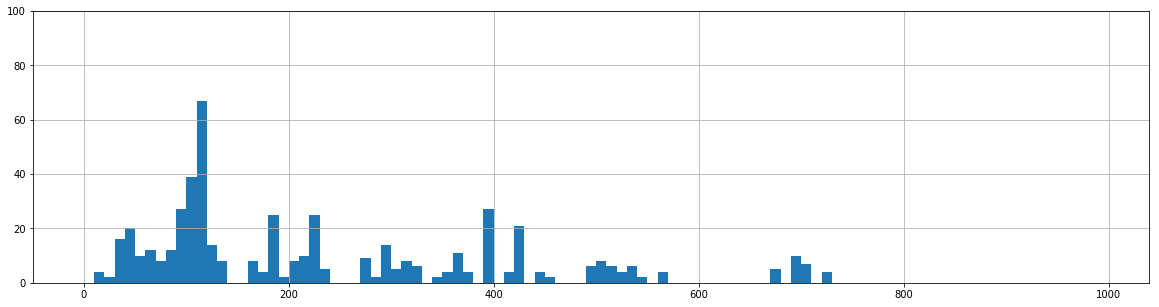

In [40]:
plt.figure(figsize=(20, 5))
plt.hist(values9_num, bins=np.arange(0, 1000, 10))
plt.ylim([0, 100])
plt.grid()
plt.show()

In [137]:
save_data(9, values=values9_num, conf=conf9)

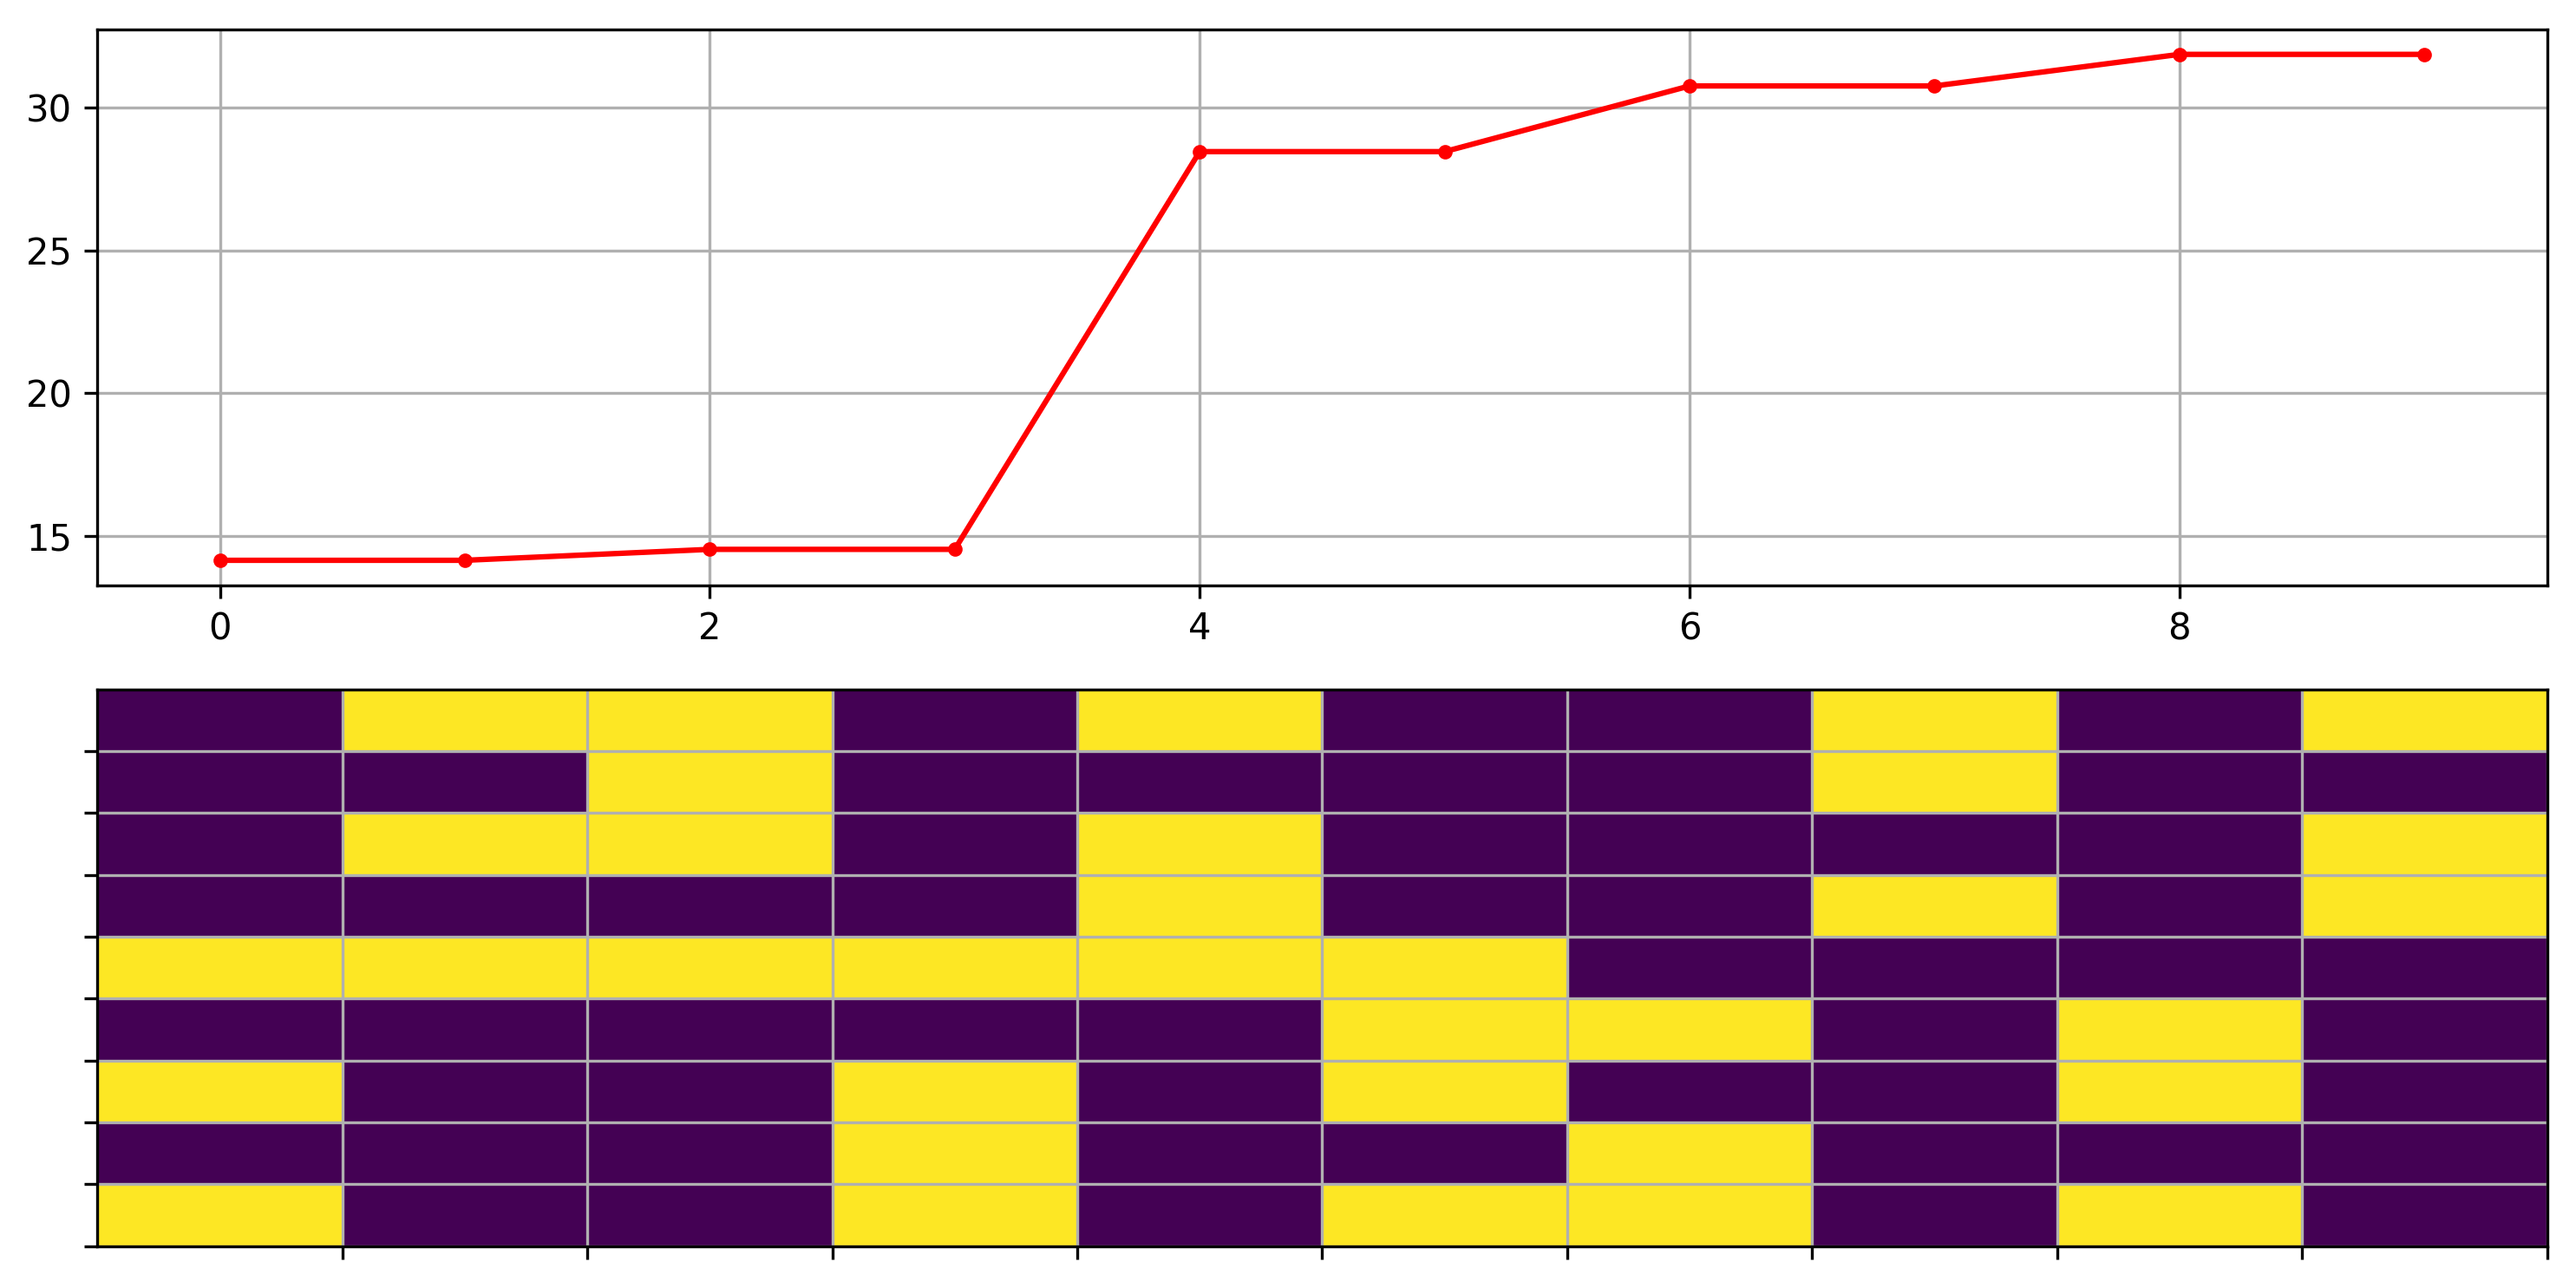

In [303]:
currents_plot(9, list(conf9_values_sorted.values())[:10], list(conf9_values_sorted.keys())[:10], figsize=(10, 5), suffix='top10')

## 10 currents - possible solutions

In [32]:
# values10, conf10 = compute_possible_conf(10)
values10_num, conf10 = compute_possible_conf(10, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values10_num)}")

  0%|          | 0/1024 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 1024/1024 [21:59<00:00,  1.97s/it]

obj function value for the optimal configuration: 20.301245081416575


In [282]:
conf10_values = get_conf_dict(values10_num, conf10)
conf10_values_gray = gray_code_repr(conf10_values)
conf10_values_sorted = sorted_repr(conf10_values)

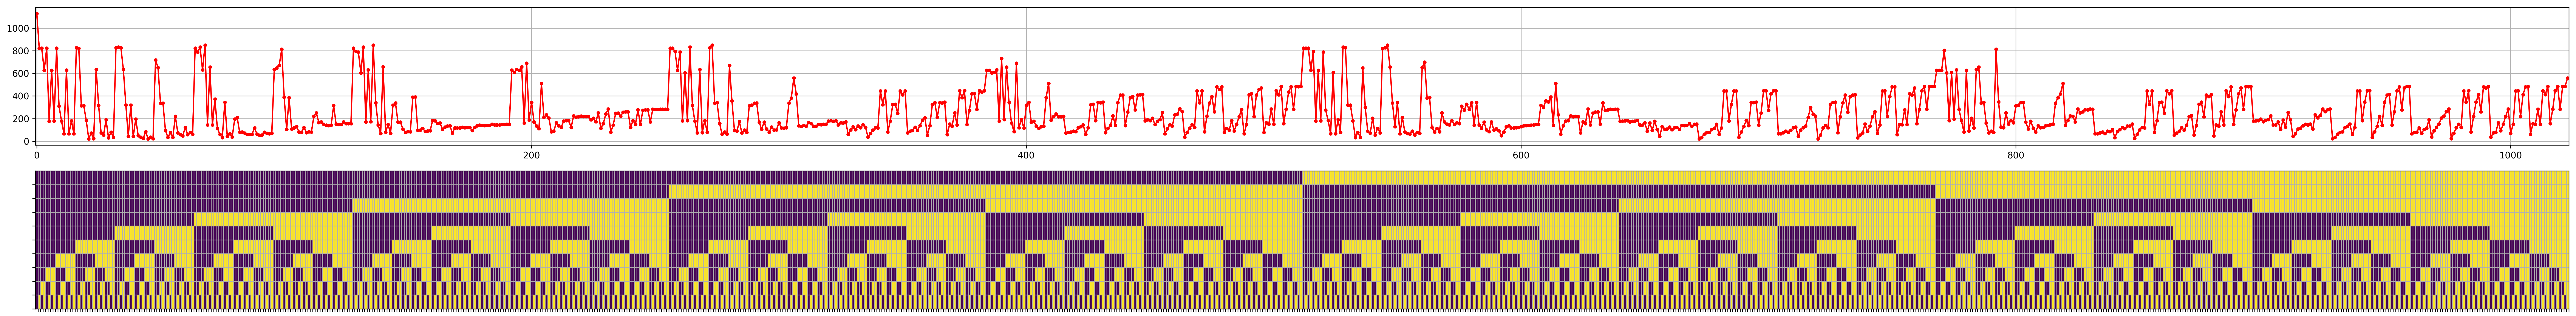

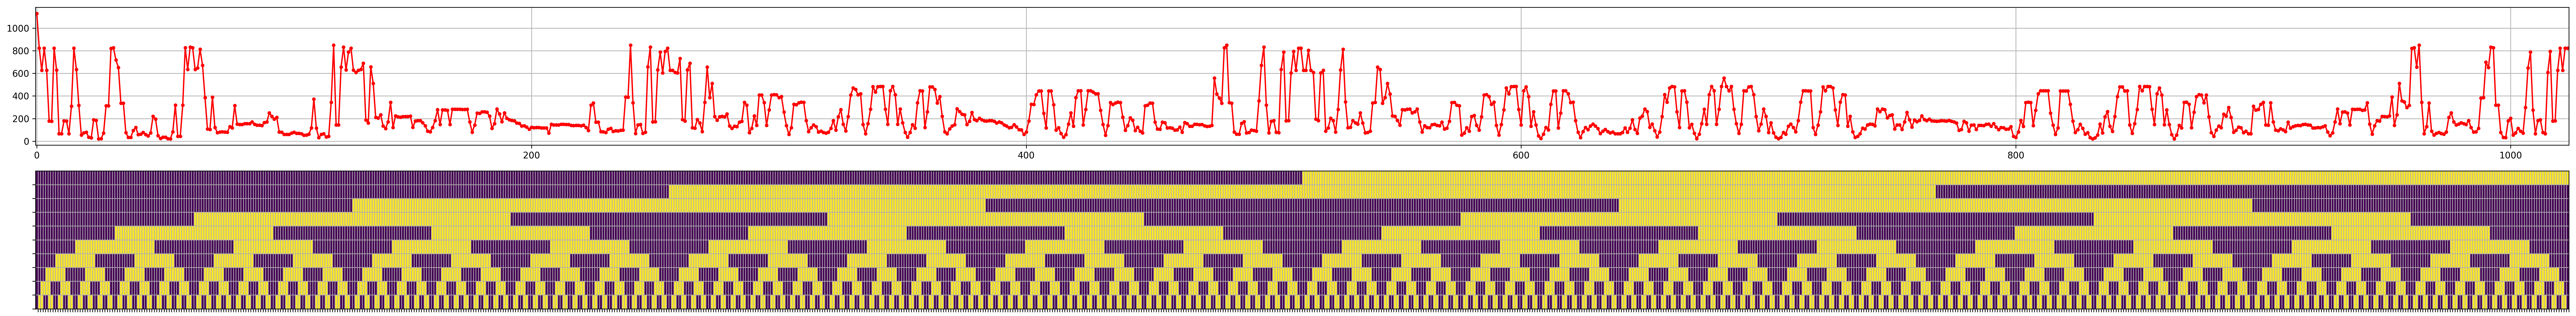

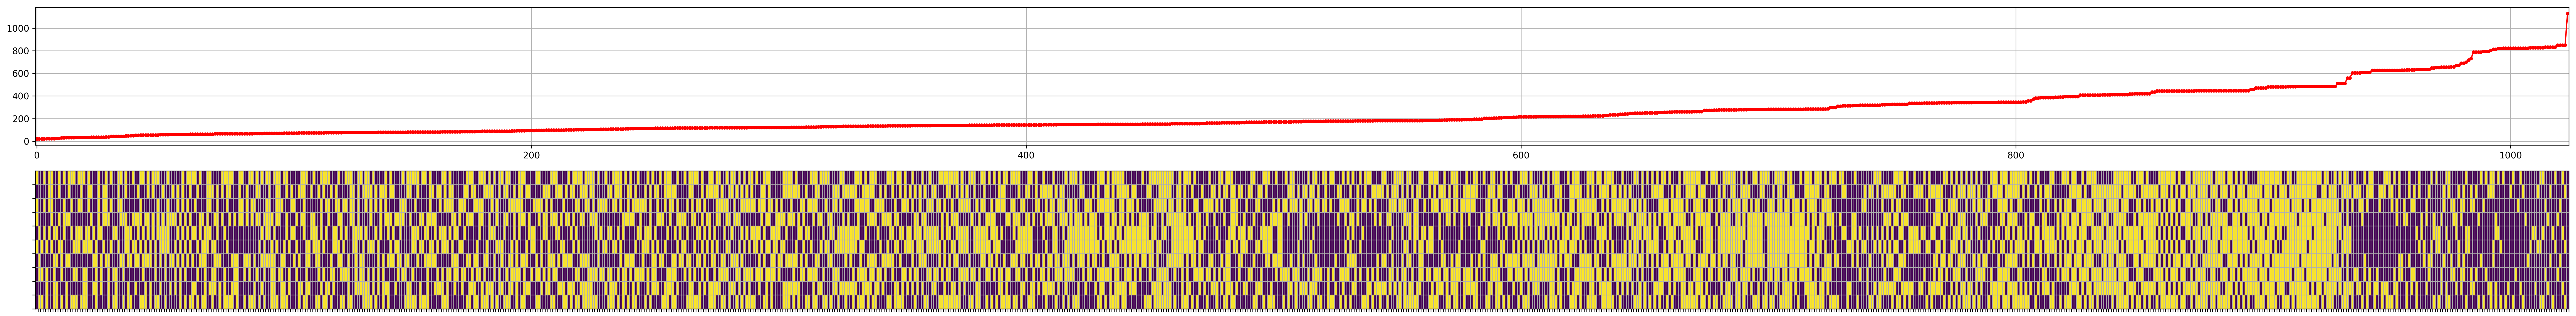

In [286]:
currents_plot(10, list(conf10_values.values()), list(conf10_values.keys()), figsize=(40, 5), suffix='original')
currents_plot(10, list(conf10_values_gray.values()), list(conf10_values_gray.keys()), figsize=(40, 5), suffix='gray')
currents_plot(10, list(conf10_values_sorted.values()), list(conf10_values_sorted.keys()), figsize=(40, 5), suffix='sorted')

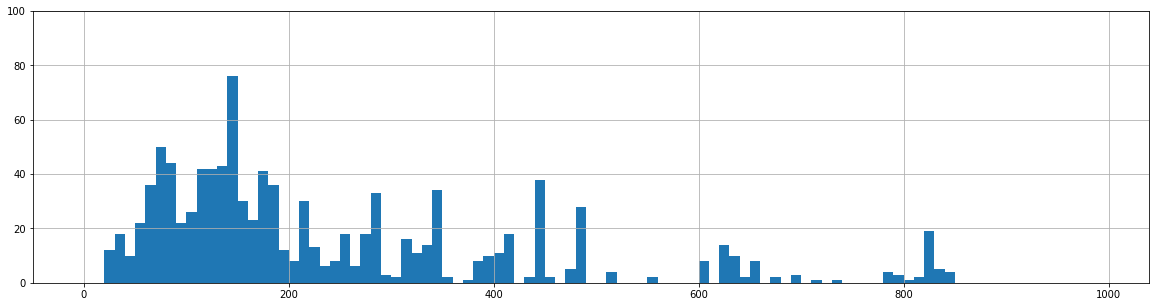

In [39]:
plt.figure(figsize=(20, 5))
plt.hist(values10_num, bins=np.arange(0, 1000, 10))
plt.ylim([0, 100])
plt.grid()
plt.show()

In [138]:
save_data(10, values=values10_num, conf=conf10)

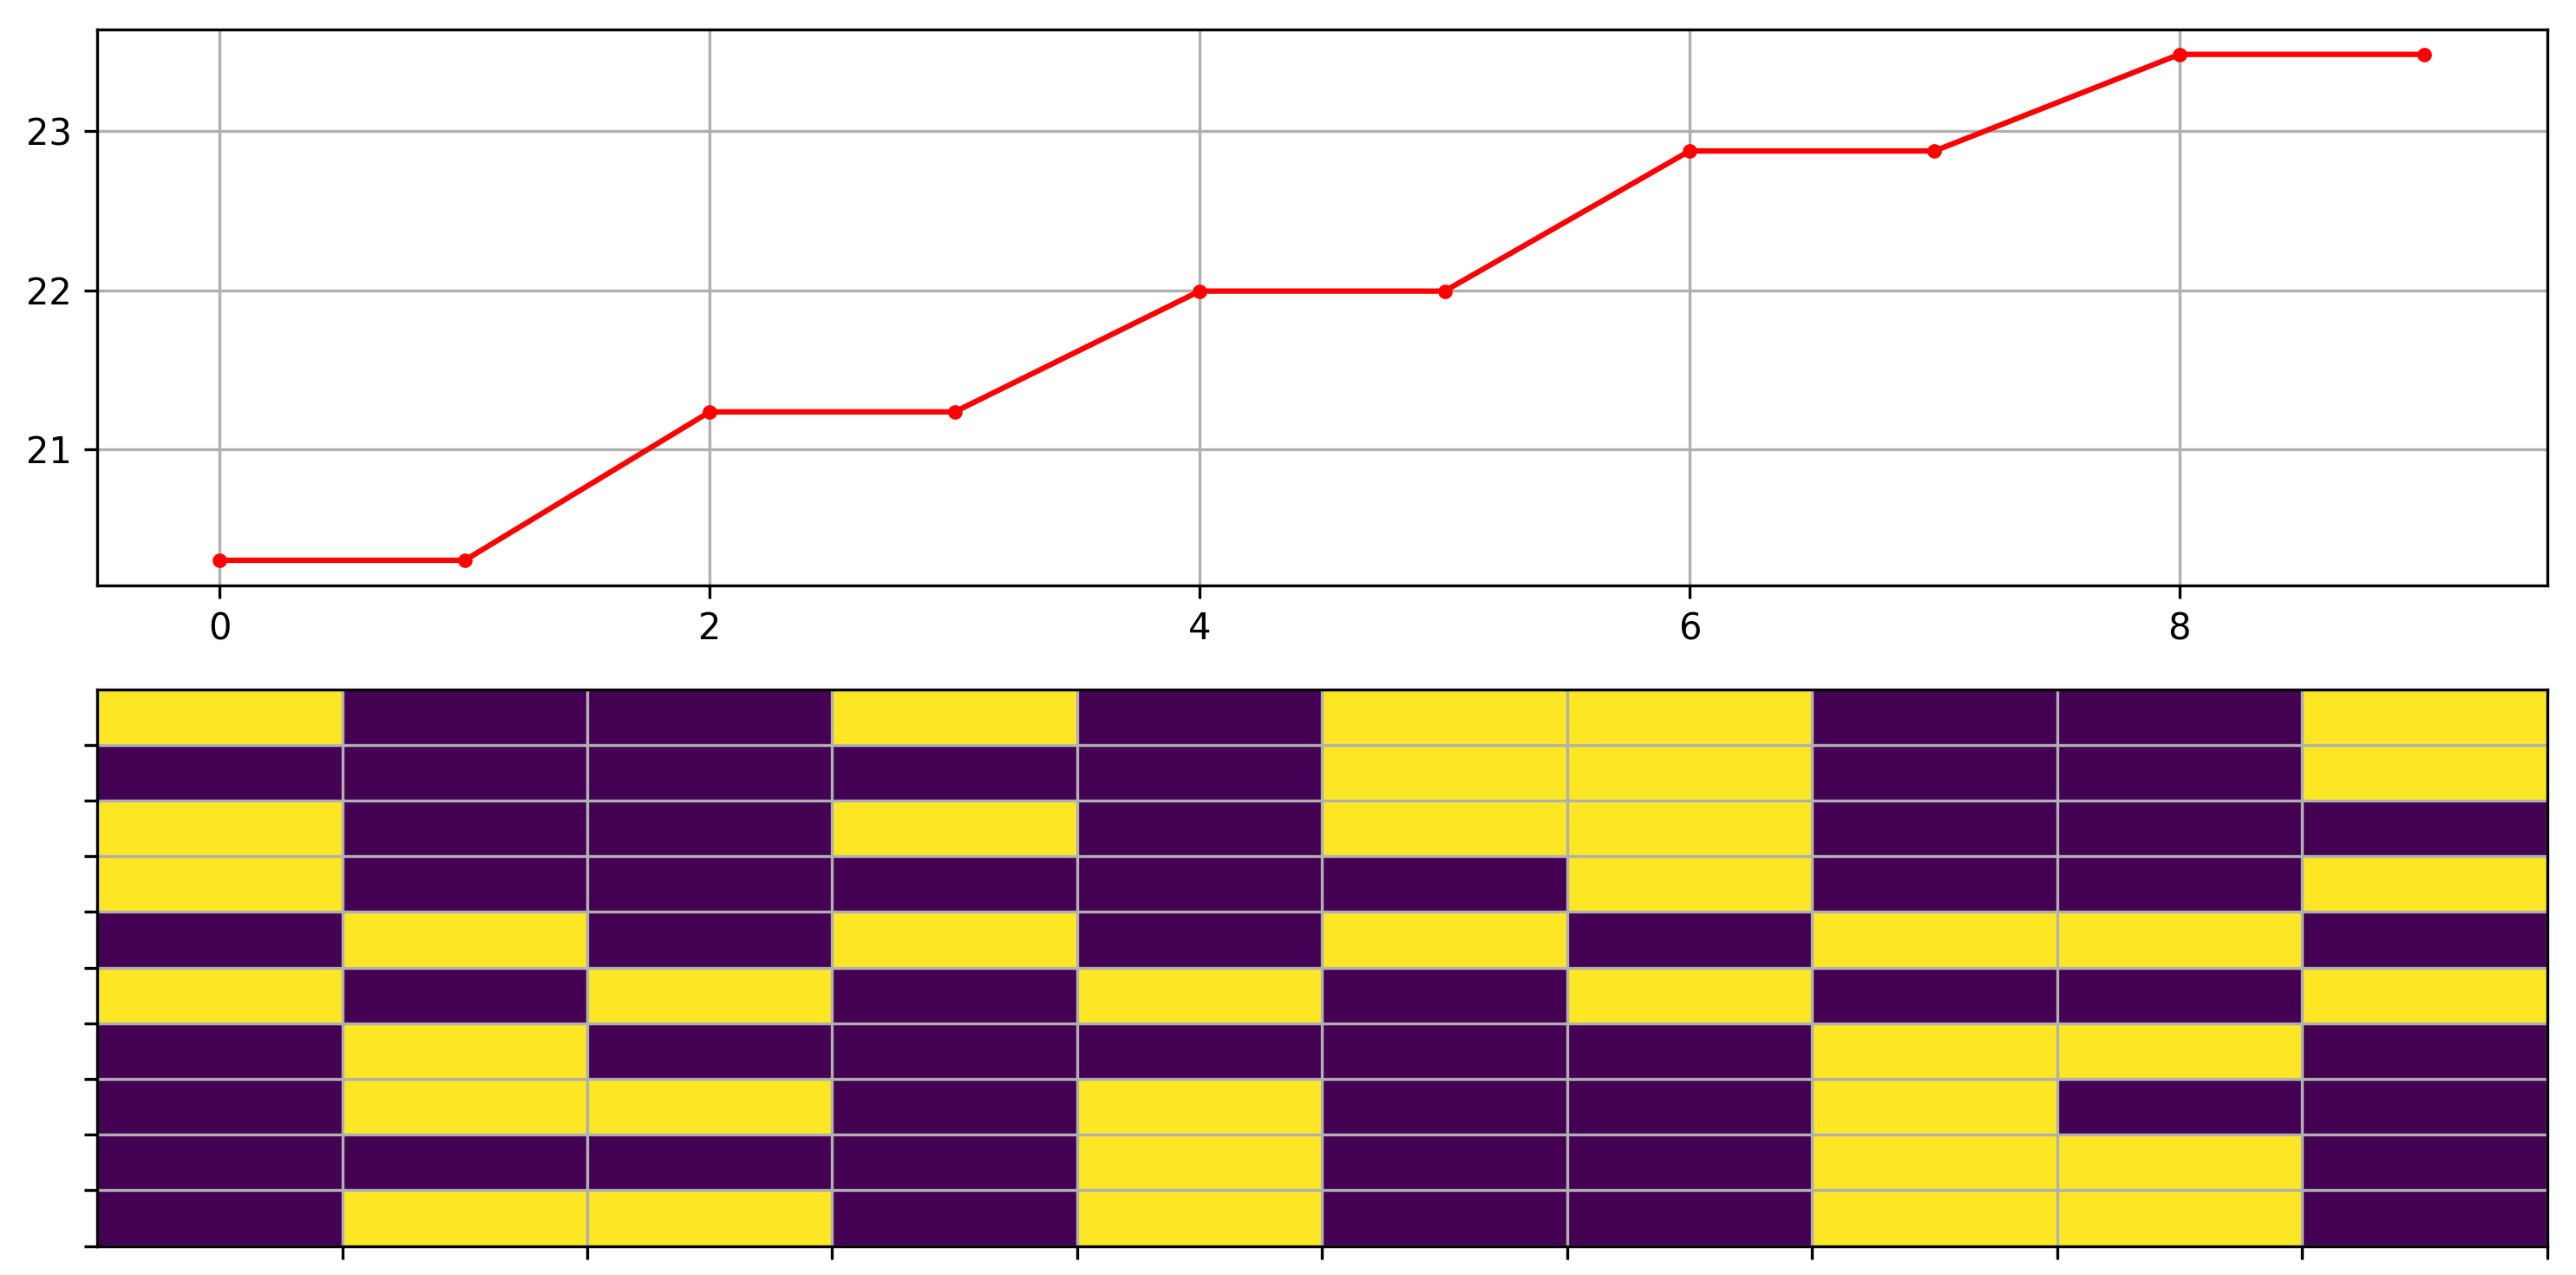

In [304]:
currents_plot(10, list(conf10_values_sorted.values())[:10], list(conf10_values_sorted.keys())[:10], figsize=(10, 5), suffix='top10')

## 11 currents - possible solutions

In [108]:
values11_num, conf11 = compute_possible_conf(11, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values11_num)}")

  0%|          | 0/2048 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
 47%|████▋     | 966/2048 [23:38<16:22,  1.10it/s]  /anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_trustregion_constr/qp_subproblem.py:308: RuntimeWarning: invalid value encountered in less_equal
  return (lb <= x).all() and (x <= ub).all()
100%|██████████| 2048/2048 [55:04<00:00,  2.23s/it]

obj function value for the optimal configuration: 16.511928074486093


In [287]:
conf11_values = get_conf_dict(values11_num, conf11)
conf11_values_gray = gray_code_repr(conf11_values)
conf11_values_sorted = sorted_repr(conf11_values)

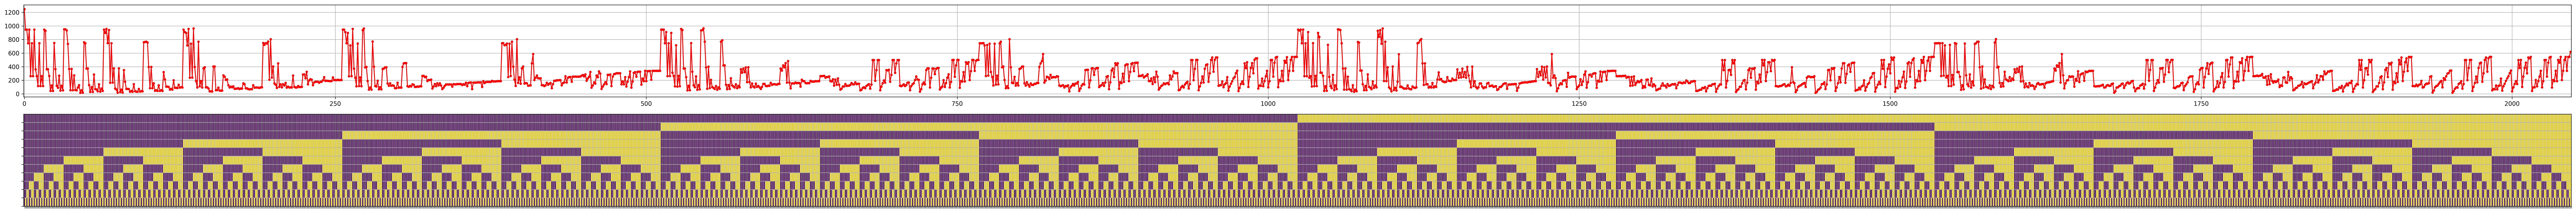

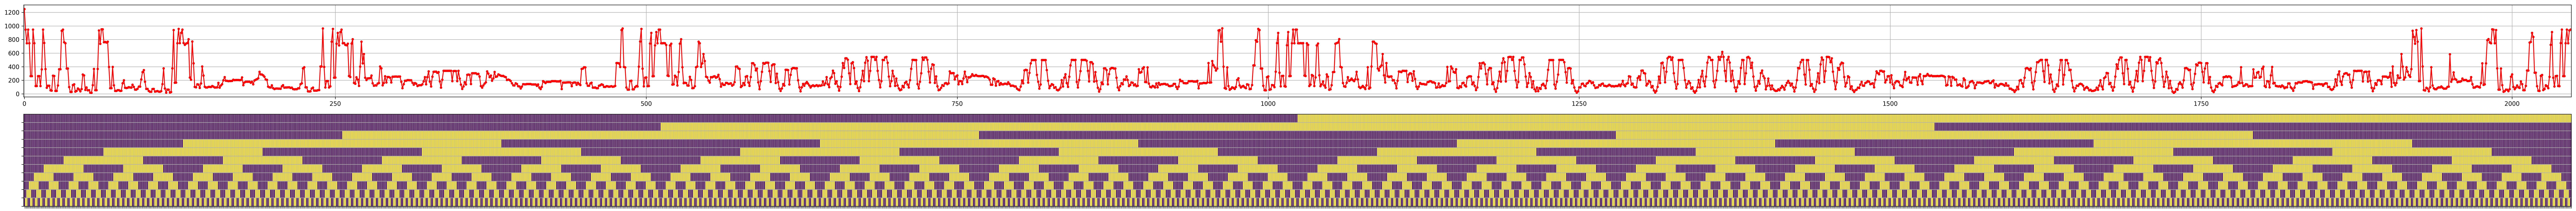

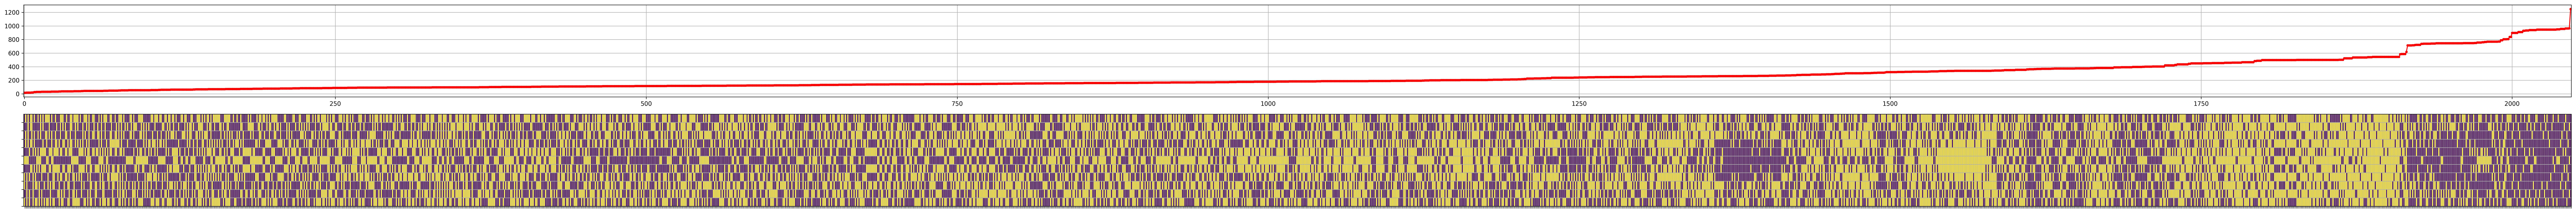

In [289]:
currents_plot(11, list(conf11_values.values()), list(conf11_values.keys()), figsize=(60, 5), suffix='original')
currents_plot(11, list(conf11_values_gray.values()), list(conf11_values_gray.keys()), figsize=(60, 5), suffix='gray')
currents_plot(11, list(conf11_values_sorted.values()), list(conf11_values_sorted.keys()), figsize=(60, 5), suffix='sorted')

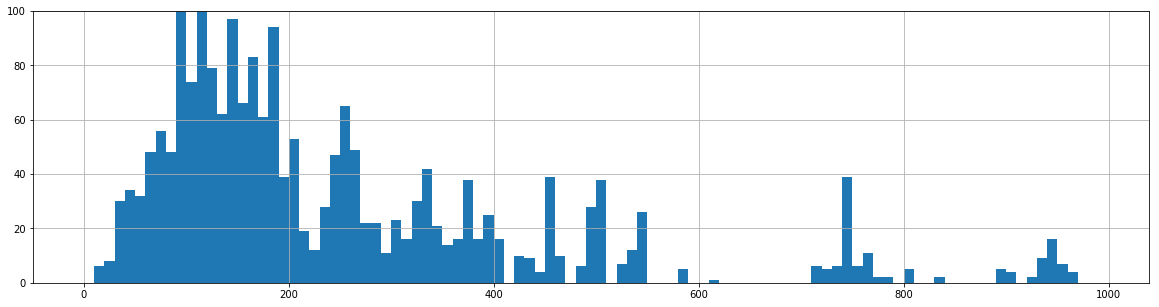

In [109]:
plt.figure(figsize=(20, 5))
plt.hist(values11_num, bins=np.arange(0, 1000, 10))
plt.ylim([0, 100])
plt.grid()
plt.show()

In [140]:
save_data(11, values=values11_num, conf=conf11)

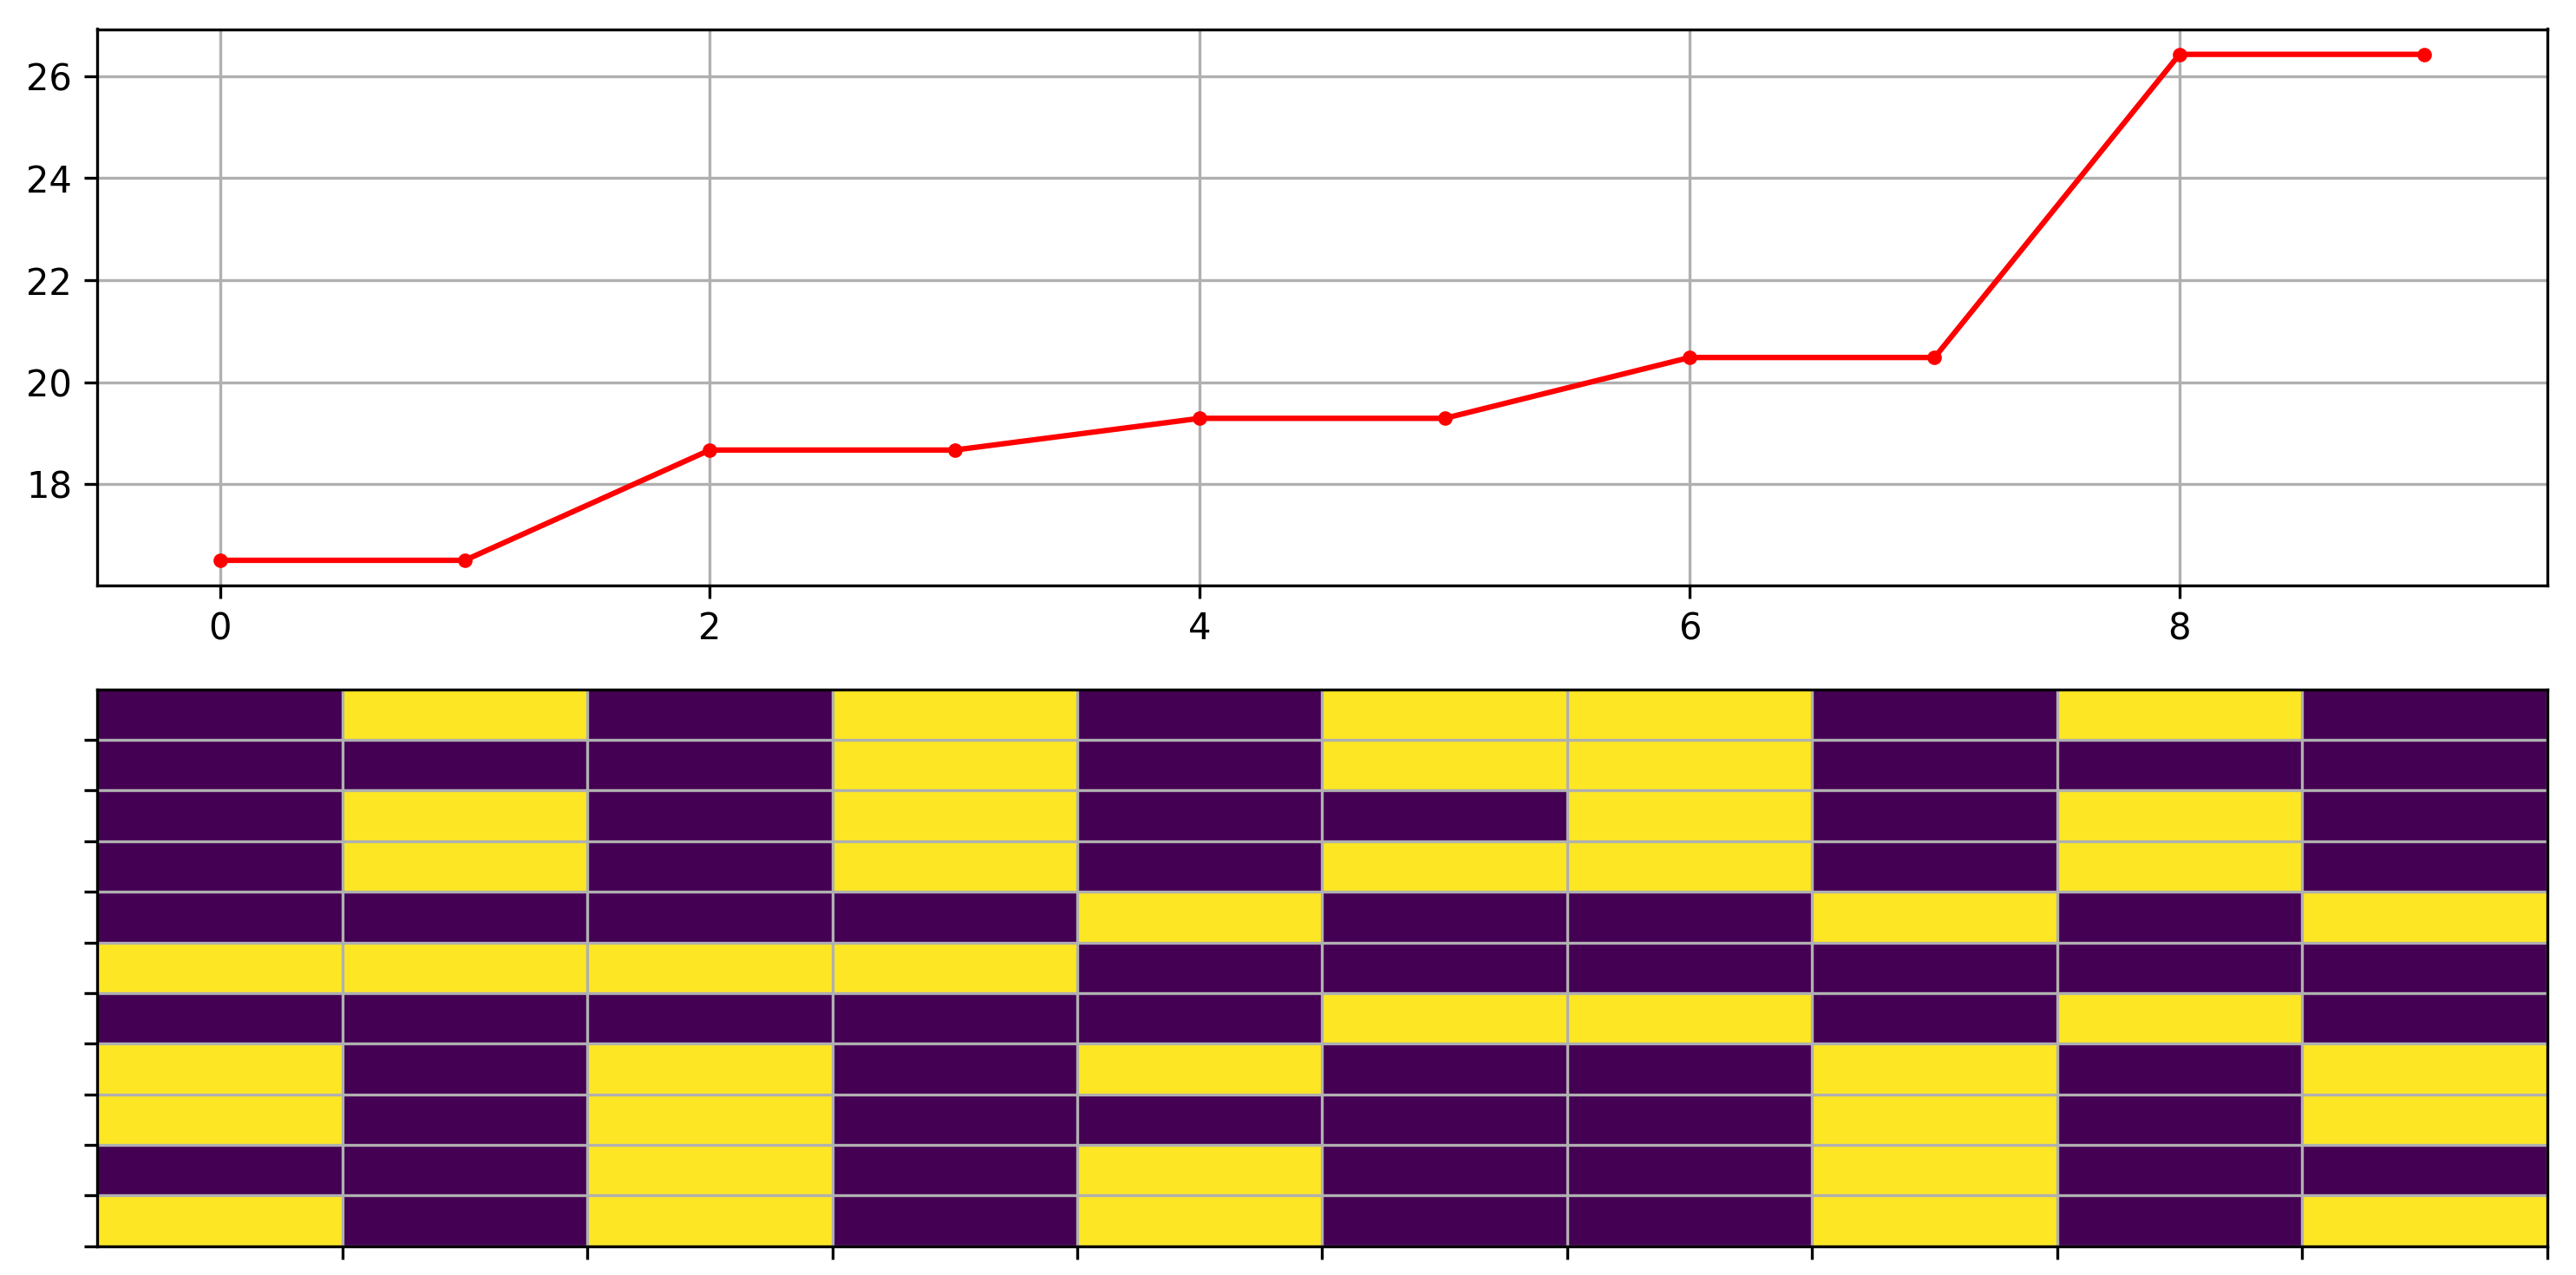

In [307]:
currents_plot(11, 
              list(conf11_values_sorted.values())[:10], 
              list(conf11_values_sorted.keys())[:10], 
              figsize=(10, 5),
              suffix='top10')

In [116]:
idx_max = list((-np.array(values)).argsort()[:200])
idx_min = list((np.array(values)).argsort()[:1])
print(idx_min)

[720]


In [94]:
configurations[720]

(1, 0, 1, 1, 0, 1, 0, 0, 0, 0)

In [117]:
cfg_image = []
for i in idx_min:
    cfg_image.append([*configurations[i]])

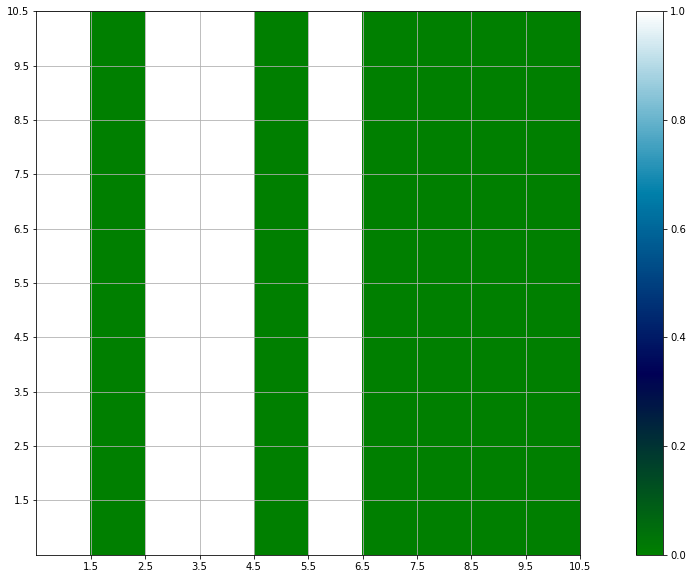

In [118]:
plt.figure(figsize=(20, 10))
plt.imshow(np.array(cfg_image), interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.xticks(np.arange(1.5, 11.5, 1))
plt.yticks(np.arange(1.5, 11.5, 1))
plt.grid(b=True, which='major')
plt.show()

In [56]:
antenna.set_configuration(configurations[720])
antenna.set_allocation_constraint(None)
_, I = antenna.get_optimal_current_allocation(opt_params, x0=-np.ones(antenna.N))
T = antenna.set_currents(I)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |  21   |   0   | +6.5369e+02 | 1.00e+00 | 2.80e+02 | 0.00e+00 | 1.00e+00 |   0   |
|   2   |  42   |   1   | +1.0671e+02 | 7.00e+00 | 1.92e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   3   |  63   |   3   | +1.0671e+02 | 7.00e-01 | 1.92e+02 | 0.00e+00 | 1.00e+00 |   4   |
|   4   |  84   |   5   | +7.5180e+01 | 1.40e+00 | 1.51e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   5   |  105  |   7   | +7.5180e+01 | 7.00e-01 | 1.51e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   6   |  126  |   9   | +7.5180e+01 | 3.50e-01 | 1.51e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   7   |  147  |  11   | +4.4745e+01 | 7.00e-01 | 5.65e+01 | 0.00e+00 | 1.00e+00 |   2   |
|   8   |  168  |  15   | +4.4164e+01 | 7.00e-01 | 8.84e+01 | 0.00e+00 | 1.00e+00 |   4   |
|   9   |  189  |  19   | +3.3816e+01 | 1.19e+00 | 5.57e+01 | 0.00e+00 | 1.00e+0

In [63]:
antenna.I = np.log(T)

/anaconda3/envs/p-sci/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


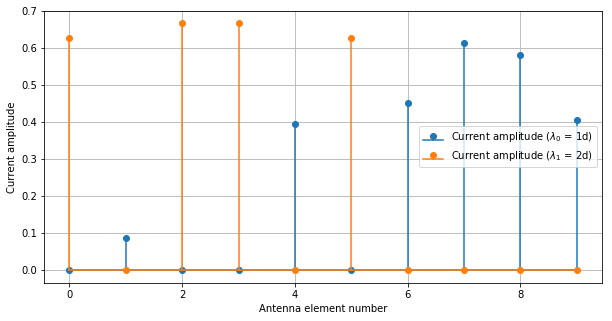

In [64]:
antenna.plot_current_distribution()

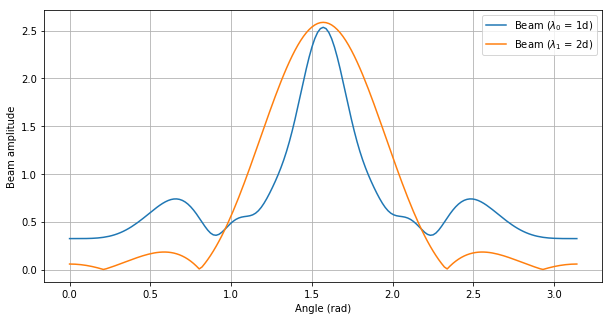

In [65]:
antenna.plot_formed_beams()

In [119]:
antenna_params["number_of_antenna_elements"] = 11
opt_params["options"]["verbose"] = 0
antenna = Antenna(antenna_params)
antenna.set_objective(weights=[1.0, 1.0])
configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))

values = []
for cfg in tqdm(configurations):
    antenna.set_configuration(cfg)
    f, _ = antenna.get_optimal_current_allocation(opt_params, x0=-np.ones(antenna.N))
    values.append(f)

  0%|          | 0/2048 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
 47%|████▋     | 966/2048 [23:40<16:29,  1.09it/s]  /anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_trustregion_constr/qp_subproblem.py:308: RuntimeWarning: invalid value encountered in less_equal
  return (lb <= x).all() and (x <= ub).all()
100%|██████████| 2048/2048 [56:07<00:00,  2.26s/it]


In [120]:
values = np.array(values)

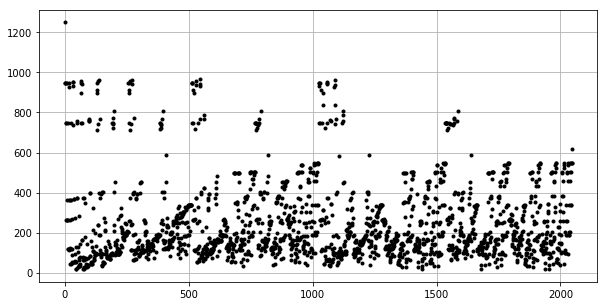

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, values.shape[0]), values, '.k')
plt.grid(True)

In [128]:
idx_max = list((-np.array(values)).argsort()[:200])
idx_min = list((np.array(values)).argsort()[:2])
print(idx_min)

[45, 1440]


In [129]:
configurations[1440]

(1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0)

In [123]:
cfg_image = []
for i in idx_min:
    cfg_image.append([*configurations[i]])

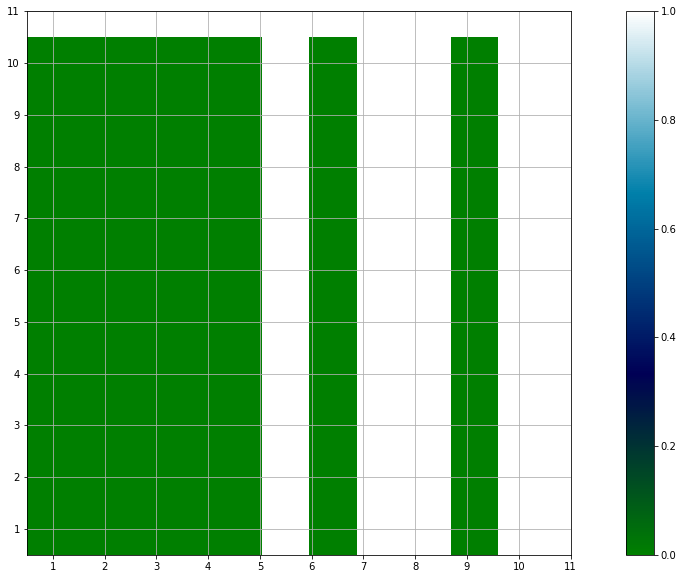

In [126]:
plt.figure(figsize=(20, 10))
plt.imshow(np.array(cfg_image), interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(1, 12, 1))
plt.grid(b=True, which='major')
plt.show()

In [6]:
antenna_params["N"] = 12
opt_params["options"]["verbose"] = 0
antenna = Antenna(antenna_params)
antenna.set_objective(weights=[1.0, 1.0])
configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))

values = []
for cfg in tqdm(configurations):
    antenna.set_configuration(cfg)
    f, _ = antenna.get_optimal_current_allocation(opt_params, x0=-np.ones(antenna.N), cons=False)
    values.append(f)



  0%|          | 0/4096 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


  0%|          | 1/4096 [00:00<37:18,  1.83it/s]

  0%|          | 2/4096 [00:04<1:54:40,  1.68s/it]

  0%|          | 3/4096 [00:06<1:50:41,  1.62s/it]

  0%|          | 4/4096 [00:06<1:22:29,  1.21s/it]

  0%|          | 5/4096 [00:07<1:13:44,  1.08s/it]

  0%|          | 6/4096 [00:07<1:03:51,  1.07it/s]

  0%|          | 7/4096 [00:08<55:07,  1.24it/s]  

  0%|          | 8/4096 [00:13<2:18:39,  2.04s/it]

  0%|          | 9/4096 [00:18<3:25:43,  3.02s/it]

  0%|          | 10/4096 [00:19<2:34:46,  2.27s/it]

  0%|          | 11/4096 [00:19<1:59:10,  1.75s/it]

  0%|          | 12/4096 [00:20<1:34:18

KeyboardInterrupt: 

In [ ]:
values = np.array(values)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, values.shape[0]), values, '.k')
plt.grid(True)